Connected to cmb-della8 (Python 3.8.3)

In [9]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from itertools import combinations_with_replacement as cwr, permutations
from random import sample, seed

def get_null_list(surveys, arrays, spectra):
    map_set_list = []
    for sv in surveys:
        for ar in arrays:
            map_set_list.append(f"{sv}_{ar}")
    null_list = []
    for i, (ms1, ms2) in enumerate(cwr(map_set_list, 2)):
        for j, (ms3, ms4) in enumerate(cwr(map_set_list, 2)):
            if j <= i: continue
            for m in spectra:
                null_list += [[m, (ms1, ms2), (ms3, ms4)]]

    return null_list

def pte_histo(pte_list, null_test, n_bins):
    n_samples = len(pte_list)

    bins = np.linspace(0, 1, n_bins + 1)

    min, max = np.min(pte_list), np.max(pte_list)
    id_high = np.where(np.array(pte_list) > 0.99)
    id_low = np.where(np.array(pte_list) < 0.01)

    nPTE_high = len(id_high[0])
    nPTE_low =  len(id_low[0])

    ks_test_pvalue = stats.kstest(pte_list, 'uniform', alternative='two-sided', mode='exact').pvalue

    plt.figure(figsize=(8,6))
    plt.xlabel(r"Probability to exceed (PTE)")
    plt.title(null_test)
    plt.hist(pte_list, bins=bins, histtype='step', label=f"n tests: {n_samples}, min: {min:.4f}, max: {max:.4f}, [PTE>0.99]: {nPTE_high}, [PTE<0.01]: {nPTE_low}, ks pvalue: {ks_test_pvalue:.3f}")
    plt.axhline(n_samples/n_bins, color="k", ls="--")
    plt.tight_layout()
    plt.legend()
    plt.show()

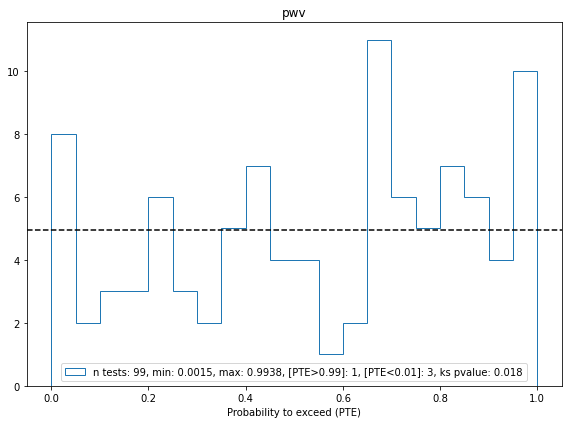

In [10]:
null_test = "pwv"
spectra = ["TT", "TE", "TB", "ET", "BT", "EE", "EB", "BE", "BB"]

if null_test == "elevation":
    surveys = ["el1", "el2", "el3"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 60

if null_test == "pwv":
    surveys = ["pwv1", "pwv2"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 20

if null_test == "inout":
    surveys = ["dr6"]
    test_arrays = [["pa4_f220_in", "pa4_f220_out"],
                   ["pa5_f090_in", "pa5_f090_out"],
                   ["pa5_f150_in", "pa5_f150_out"],
                   ["pa6_f090_in", "pa6_f090_out"],
                   ["pa6_f150_in", "pa6_f150_out"]]
    n_bins = 20

pte_list = []
for t_ar in test_arrays:
    null_list = get_null_list(surveys, t_ar, spectra)
    for null in null_list:
        mode, (ms1, ms2), (ms3, ms4) = null

        if null_test in ["elevation", "pwv"]:
            my_ar = t_ar[0]
        else:
            my_ar = t_ar[0][:8]

        if (ms1 == ms2) & (ms3 == ms4) & (mode in ["ET", "BT", "BE"]) :
            # print(f"skip {ms1}x{ms2}-{ms3}x{ms4} {mode} since it's a doublon of {mode[::-1]}")
            continue
        if (my_ar == "pa4_f220" ) & (mode != "TT"):
            continue

        res_dict = pickle.load(open(f"/scratch/gpfs/zatkins/data/simonsobs/PSpipe/project/dr6v4_unblinding/nulls/{null_test}/null_test_{my_ar}/diff_{mode}_{ms1}x{ms2}_{ms3}x{ms4}.pkl", "rb"))

        name = res_dict["fname"]
        chi2 = res_dict["chi2"]
        pte = res_dict["pte"]

        pte_list = np.append(pte_list, pte)

pte_histo(pte_list, null_test, n_bins)

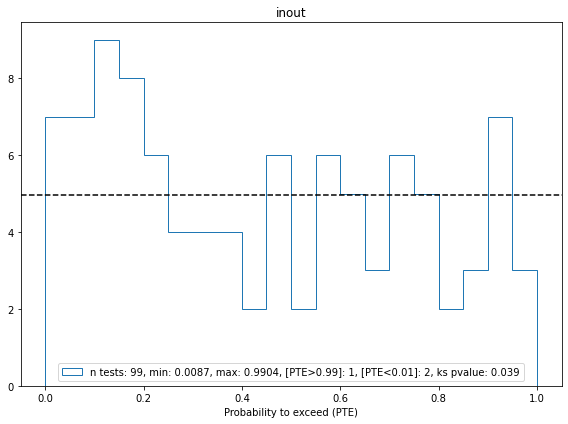

In [11]:
null_test = "inout"
spectra = ["TT", "TE", "TB", "ET", "BT", "EE", "EB", "BE", "BB"]

if null_test == "elevation":
    surveys = ["el1", "el2", "el3"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 60

if null_test == "pwv":
    surveys = ["pwv1", "pwv2"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 20

if null_test == "inout":
    surveys = ["dr6"]
    test_arrays = [["pa4_f220_in", "pa4_f220_out"],
                   ["pa5_f090_in", "pa5_f090_out"],
                   ["pa5_f150_in", "pa5_f150_out"],
                   ["pa6_f090_in", "pa6_f090_out"],
                   ["pa6_f150_in", "pa6_f150_out"]]
    n_bins = 20

pte_list = []
for t_ar in test_arrays:
    null_list = get_null_list(surveys, t_ar, spectra)
    for null in null_list:
        mode, (ms1, ms2), (ms3, ms4) = null

        if null_test in ["elevation", "pwv"]:
            my_ar = t_ar[0]
        else:
            my_ar = t_ar[0][:8]

        if (ms1 == ms2) & (ms3 == ms4) & (mode in ["ET", "BT", "BE"]) :
            # print(f"skip {ms1}x{ms2}-{ms3}x{ms4} {mode} since it's a doublon of {mode[::-1]}")
            continue
        if (my_ar == "pa4_f220" ) & (mode != "TT"):
            continue

        res_dict = pickle.load(open(f"/scratch/gpfs/zatkins/data/simonsobs/PSpipe/project/dr6v4_unblinding/nulls/{null_test}/null_test_{my_ar}/diff_{mode}_{ms1}x{ms2}_{ms3}x{ms4}.pkl", "rb"))

        name = res_dict["fname"]
        chi2 = res_dict["chi2"]
        pte = res_dict["pte"]

        pte_list = np.append(pte_list, pte)

pte_histo(pte_list, null_test, n_bins)

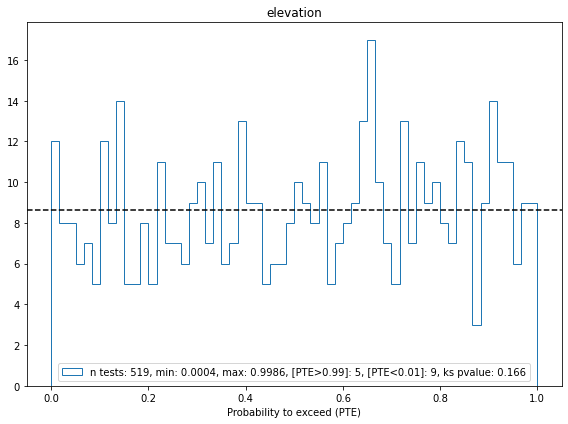

In [12]:
null_test = "elevation"
spectra = ["TT", "TE", "TB", "ET", "BT", "EE", "EB", "BE", "BB"]

if null_test == "elevation":
    surveys = ["el1", "el2", "el3"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 60

if null_test == "pwv":
    surveys = ["pwv1", "pwv2"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 20

if null_test == "inout":
    surveys = ["dr6"]
    test_arrays = [["pa4_f220_in", "pa4_f220_out"],
                   ["pa5_f090_in", "pa5_f090_out"],
                   ["pa5_f150_in", "pa5_f150_out"],
                   ["pa6_f090_in", "pa6_f090_out"],
                   ["pa6_f150_in", "pa6_f150_out"]]
    n_bins = 20

pte_list = []
for t_ar in test_arrays:
    null_list = get_null_list(surveys, t_ar, spectra)
    for null in null_list:
        mode, (ms1, ms2), (ms3, ms4) = null

        if null_test in ["elevation", "pwv"]:
            my_ar = t_ar[0]
        else:
            my_ar = t_ar[0][:8]

        if (ms1 == ms2) & (ms3 == ms4) & (mode in ["ET", "BT", "BE"]) :
            # print(f"skip {ms1}x{ms2}-{ms3}x{ms4} {mode} since it's a doublon of {mode[::-1]}")
            continue
        if (my_ar == "pa4_f220" ) & (mode != "TT"):
            continue

        res_dict = pickle.load(open(f"/scratch/gpfs/zatkins/data/simonsobs/PSpipe/project/dr6v4_unblinding/nulls/{null_test}/null_test_{my_ar}/diff_{mode}_{ms1}x{ms2}_{ms3}x{ms4}.pkl", "rb"))

        name = res_dict["fname"]
        chi2 = res_dict["chi2"]
        pte = res_dict["pte"]

        pte_list = np.append(pte_list, pte)

pte_histo(pte_list, null_test, n_bins)

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from itertools import combinations_with_replacement as cwr, permutations
from random import sample, seed

def get_null_list(surveys, arrays, spectra):
    map_set_list = []
    for sv in surveys:
        for ar in arrays:
            map_set_list.append(f"{sv}_{ar}")
    null_list = []
    crosspecs = []
    for i, (ms1, ms2) in enumerate(cwr(map_set_list, 2)):
        crosspecs.append((ms1, ms2))
        for j, (ms3, ms4) in enumerate(cwr(map_set_list, 2)):
            if j <= i: continue
            for m in spectra:
                null_list += [[m, (ms1, ms2), (ms3, ms4)]]

    return null_list, crosspecs

def get_best_null_sets(specs):
    perms = list(permutations(specs, len(specs)))

    for s in perms:
        if s[::-1] in perms:
            perms.remove(s[::-1])

    best_sets = []

    for s in perms:
        nulls = tuple([s[i], s[i+1]] for i in range(len(list(s)) - 1))
        best_sets.append(nulls)

    return best_sets

def pte_histo(null_test, list_of_pte_lists, list_of_pte_titles, n_bins):    
    ks_test_list = []
    for i, pte_list in enumerate(list_of_pte_lists):
        plt.figure(figsize=(8,6))
        n_samples = len(pte_list)

        bins = np.linspace(0, 1, n_bins + 1)

        min, max = np.min(pte_list), np.max(pte_list)
        id_high = np.where(np.array(pte_list) > 0.99)
        id_low = np.where(np.array(pte_list) < 0.01)

        nPTE_high = len(id_high[0])
        nPTE_low =  len(id_low[0])

        ks_test_pvalue = stats.kstest(pte_list, 'uniform', alternative='two-sided', mode='exact').pvalue
        ks_test_list.append(ks_test_pvalue)

        plt.hist(pte_list, bins=bins, histtype='step', label=f"n tests: {n_samples}, min: {min:.4f}, max: {max:.4f}, [PTE>0.99]: {nPTE_high}, [PTE<0.01]: {nPTE_low}, ks pvalue: {ks_test_pvalue:.3f}")
        plt.xlabel(r"Probability to exceed (PTE)")
        plt.axhline(n_samples/n_bins, color="k", ls="--")

        title = list_of_pte_titles[i]
        new_title = []
        for sample in title:
            sample_ = []
            for null_pair in sample:
                np_ = ""
                for s in null_pair:
                    if null_test in ['elevation', 'pwv']:
                        np_ += s.split('_')[0]
                    else:
                        np_ += s.split('_')[-1]
                sample_.append(np_)
            new_title.append(sample_)     
        plt.title(new_title)
        plt.tight_layout()
        plt.legend()
        plt.show()

    plt.figure(figsize=(8,6))
    plt.hist(ks_test_list, bins=10, histtype='step')
    plt.title(f'ks tests over {len(ks_test_list)} subsamples')
    plt.show()

[([('pwv1_pa4_f220', 'pwv1_pa4_f220'), ('pwv1_pa4_f220', 'pwv2_pa4_f220')], [('pwv1_pa4_f220', 'pwv2_pa4_f220'), ('pwv2_pa4_f220', 'pwv2_pa4_f220')]), ([('pwv1_pa4_f220', 'pwv2_pa4_f220'), ('pwv1_pa4_f220', 'pwv1_pa4_f220')], [('pwv1_pa4_f220', 'pwv1_pa4_f220'), ('pwv2_pa4_f220', 'pwv2_pa4_f220')]), ([('pwv1_pa4_f220', 'pwv1_pa4_f220'), ('pwv2_pa4_f220', 'pwv2_pa4_f220')], [('pwv2_pa4_f220', 'pwv2_pa4_f220'), ('pwv1_pa4_f220', 'pwv2_pa4_f220')])]
[([('pwv1_pa5_f090', 'pwv1_pa5_f090'), ('pwv1_pa5_f090', 'pwv2_pa5_f090')], [('pwv1_pa5_f090', 'pwv2_pa5_f090'), ('pwv2_pa5_f090', 'pwv2_pa5_f090')]), ([('pwv1_pa5_f090', 'pwv2_pa5_f090'), ('pwv1_pa5_f090', 'pwv1_pa5_f090')], [('pwv1_pa5_f090', 'pwv1_pa5_f090'), ('pwv2_pa5_f090', 'pwv2_pa5_f090')]), ([('pwv1_pa5_f090', 'pwv1_pa5_f090'), ('pwv2_pa5_f090', 'pwv2_pa5_f090')], [('pwv2_pa5_f090', 'pwv2_pa5_f090'), ('pwv1_pa5_f090', 'pwv2_pa5_f090')])]
[([('pwv1_pa5_f150', 'pwv1_pa5_f150'), ('pwv1_pa5_f150', 'pwv2_pa5_f150')], [('pwv1_pa5_f150', 'pw

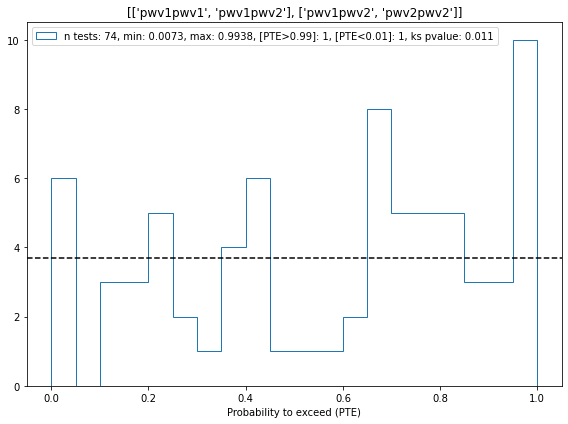

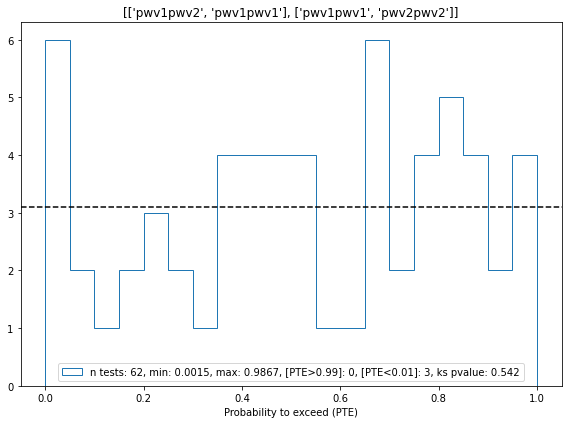

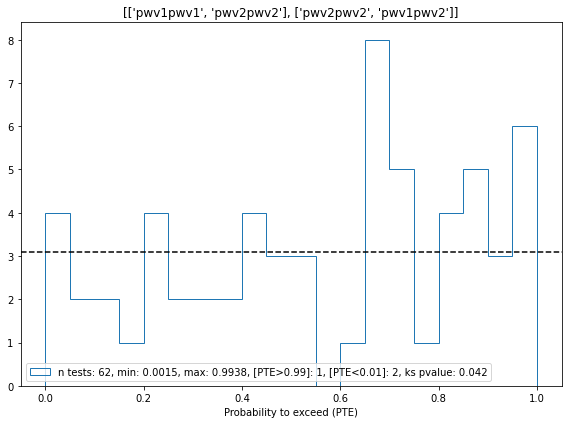

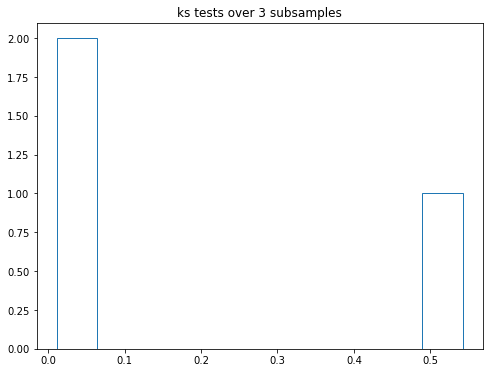

In [3]:
null_test = "pwv"
spectra = ["TT", "TE", "TB", "ET", "BT", "EE", "EB", "BE", "BB"]

if null_test == "elevation":
    surveys = ["el1", "el2", "el3"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 60
    n_subsamp = 10

if null_test == "pwv":
    surveys = ["pwv1", "pwv2"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 20
    n_subsamp = 3

if null_test == "inout":
    surveys = ["dr6"]
    test_arrays = [["pa4_f220_in", "pa4_f220_out"],
                   ["pa5_f090_in", "pa5_f090_out"],
                   ["pa5_f150_in", "pa5_f150_out"],
                   ["pa6_f090_in", "pa6_f090_out"],
                   ["pa6_f150_in", "pa6_f150_out"]]
    n_bins = 20
    n_subsamp = 3

list_of_pte_lists = [[] for i in range(n_subsamp)]
for t_ar in test_arrays:
    null_list, crosspecs = get_null_list(surveys, t_ar, spectra)
    best_crosspecs = get_best_null_sets(crosspecs)
    
    seed(2) # same sample of best_crosspecs for each array
    crosspecs_samples = sample(best_crosspecs, n_subsamp)
    print(crosspecs_samples)

    for i, crosspecs in enumerate(crosspecs_samples):
        for null in null_list:
            mode, (ms1, ms2), (ms3, ms4) = null
            if [(ms1, ms2), (ms3, ms4)] not in crosspecs and [(ms3, ms4), (ms1, ms2)] not in crosspecs:
                # print([(ms1, ms2), (ms3, ms4)], 'not in', crosspecs)
                continue

            if null_test in ["elevation", "pwv"]:
                my_ar = t_ar[0]
            else:
                my_ar = t_ar[0][:8]

            if (ms1 == ms2) & (ms3 == ms4) & (mode in ["ET", "BT", "BE"]) :
                # print(f"skip {ms1}x{ms2} - {ms3}x{ms4} {mode} since it's a doublon of {mode[::-1]}")
                continue
            if (my_ar == "pa4_f220") & (mode != "TT"):
                continue

            res_dict = pickle.load(open(f"/scratch/gpfs/zatkins/data/simonsobs/PSpipe/project/dr6v4_unblinding/nulls/{null_test}/null_test_{my_ar}/diff_{mode}_{ms1}x{ms2}_{ms3}x{ms4}.pkl", "rb"))

            name = res_dict["fname"]
            chi2 = res_dict["chi2"]
            pte = res_dict["pte"]

            list_of_pte_lists[i].append(pte)

pte_histo(null_test, list_of_pte_lists, crosspecs_samples, n_bins)

[([('dr6_pa4_f220_in', 'dr6_pa4_f220_in'), ('dr6_pa4_f220_in', 'dr6_pa4_f220_out')], [('dr6_pa4_f220_in', 'dr6_pa4_f220_out'), ('dr6_pa4_f220_out', 'dr6_pa4_f220_out')]), ([('dr6_pa4_f220_in', 'dr6_pa4_f220_out'), ('dr6_pa4_f220_in', 'dr6_pa4_f220_in')], [('dr6_pa4_f220_in', 'dr6_pa4_f220_in'), ('dr6_pa4_f220_out', 'dr6_pa4_f220_out')]), ([('dr6_pa4_f220_in', 'dr6_pa4_f220_in'), ('dr6_pa4_f220_out', 'dr6_pa4_f220_out')], [('dr6_pa4_f220_out', 'dr6_pa4_f220_out'), ('dr6_pa4_f220_in', 'dr6_pa4_f220_out')])]
[([('dr6_pa5_f090_in', 'dr6_pa5_f090_in'), ('dr6_pa5_f090_in', 'dr6_pa5_f090_out')], [('dr6_pa5_f090_in', 'dr6_pa5_f090_out'), ('dr6_pa5_f090_out', 'dr6_pa5_f090_out')]), ([('dr6_pa5_f090_in', 'dr6_pa5_f090_out'), ('dr6_pa5_f090_in', 'dr6_pa5_f090_in')], [('dr6_pa5_f090_in', 'dr6_pa5_f090_in'), ('dr6_pa5_f090_out', 'dr6_pa5_f090_out')]), ([('dr6_pa5_f090_in', 'dr6_pa5_f090_in'), ('dr6_pa5_f090_out', 'dr6_pa5_f090_out')], [('dr6_pa5_f090_out', 'dr6_pa5_f090_out'), ('dr6_pa5_f090_in', '

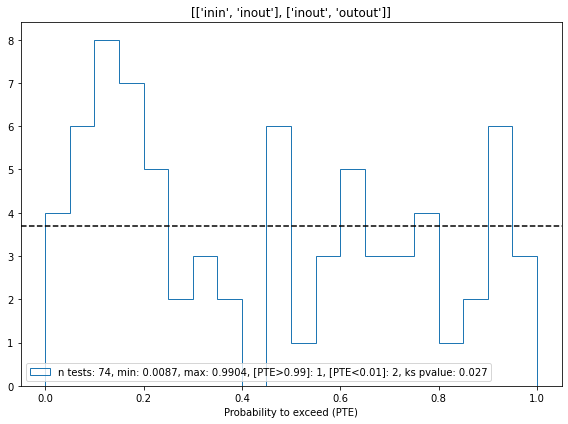

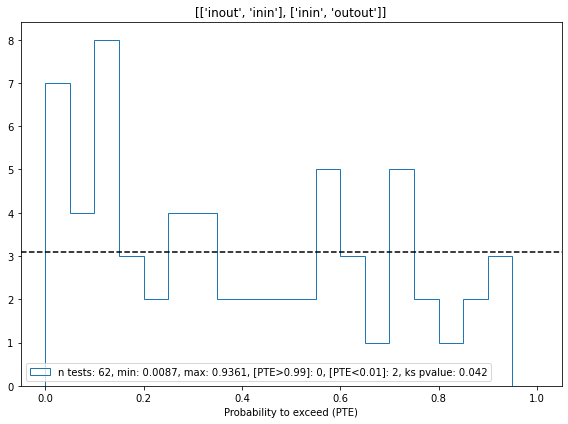

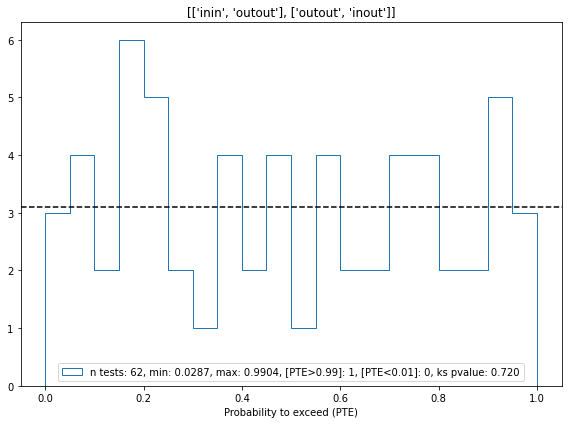

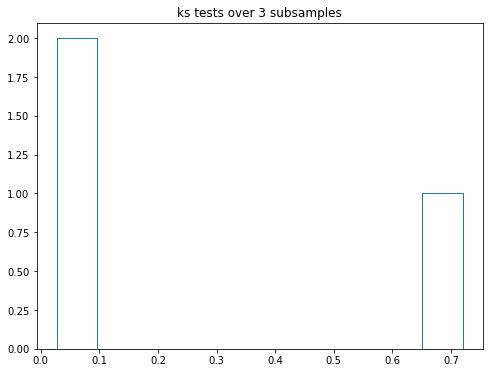

In [4]:
null_test = "inout"
spectra = ["TT", "TE", "TB", "ET", "BT", "EE", "EB", "BE", "BB"]

if null_test == "elevation":
    surveys = ["el1", "el2", "el3"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 60
    n_subsamp = 10

if null_test == "pwv":
    surveys = ["pwv1", "pwv2"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 20
    n_subsamp = 3

if null_test == "inout":
    surveys = ["dr6"]
    test_arrays = [["pa4_f220_in", "pa4_f220_out"],
                   ["pa5_f090_in", "pa5_f090_out"],
                   ["pa5_f150_in", "pa5_f150_out"],
                   ["pa6_f090_in", "pa6_f090_out"],
                   ["pa6_f150_in", "pa6_f150_out"]]
    n_bins = 20
    n_subsamp = 3

list_of_pte_lists = [[] for i in range(n_subsamp)]
for t_ar in test_arrays:
    null_list, crosspecs = get_null_list(surveys, t_ar, spectra)
    best_crosspecs = get_best_null_sets(crosspecs)
    
    seed(2) # same sample of best_crosspecs for each array
    crosspecs_samples = sample(best_crosspecs, n_subsamp)
    print(crosspecs_samples)

    for i, crosspecs in enumerate(crosspecs_samples):
        for null in null_list:
            mode, (ms1, ms2), (ms3, ms4) = null
            if [(ms1, ms2), (ms3, ms4)] not in crosspecs and [(ms3, ms4), (ms1, ms2)] not in crosspecs:
                # print([(ms1, ms2), (ms3, ms4)], 'not in', crosspecs)
                continue

            if null_test in ["elevation", "pwv"]:
                my_ar = t_ar[0]
            else:
                my_ar = t_ar[0][:8]

            if (ms1 == ms2) & (ms3 == ms4) & (mode in ["ET", "BT", "BE"]) :
                # print(f"skip {ms1}x{ms2} - {ms3}x{ms4} {mode} since it's a doublon of {mode[::-1]}")
                continue
            if (my_ar == "pa4_f220") & (mode != "TT"):
                continue

            res_dict = pickle.load(open(f"/scratch/gpfs/zatkins/data/simonsobs/PSpipe/project/dr6v4_unblinding/nulls/{null_test}/null_test_{my_ar}/diff_{mode}_{ms1}x{ms2}_{ms3}x{ms4}.pkl", "rb"))

            name = res_dict["fname"]
            chi2 = res_dict["chi2"]
            pte = res_dict["pte"]

            list_of_pte_lists[i].append(pte)

pte_histo(null_test, list_of_pte_lists, crosspecs_samples, n_bins)

[([('el1_pa4_f220', 'el1_pa4_f220'), ('el1_pa4_f220', 'el3_pa4_f220')], [('el1_pa4_f220', 'el3_pa4_f220'), ('el1_pa4_f220', 'el2_pa4_f220')], [('el1_pa4_f220', 'el2_pa4_f220'), ('el3_pa4_f220', 'el3_pa4_f220')], [('el3_pa4_f220', 'el3_pa4_f220'), ('el2_pa4_f220', 'el2_pa4_f220')], [('el2_pa4_f220', 'el2_pa4_f220'), ('el2_pa4_f220', 'el3_pa4_f220')]), ([('el1_pa4_f220', 'el1_pa4_f220'), ('el1_pa4_f220', 'el3_pa4_f220')], [('el1_pa4_f220', 'el3_pa4_f220'), ('el3_pa4_f220', 'el3_pa4_f220')], [('el3_pa4_f220', 'el3_pa4_f220'), ('el2_pa4_f220', 'el3_pa4_f220')], [('el2_pa4_f220', 'el3_pa4_f220'), ('el1_pa4_f220', 'el2_pa4_f220')], [('el1_pa4_f220', 'el2_pa4_f220'), ('el2_pa4_f220', 'el2_pa4_f220')]), ([('el1_pa4_f220', 'el1_pa4_f220'), ('el1_pa4_f220', 'el3_pa4_f220')], [('el1_pa4_f220', 'el3_pa4_f220'), ('el3_pa4_f220', 'el3_pa4_f220')], [('el3_pa4_f220', 'el3_pa4_f220'), ('el1_pa4_f220', 'el2_pa4_f220')], [('el1_pa4_f220', 'el2_pa4_f220'), ('el2_pa4_f220', 'el3_pa4_f220')], [('el2_pa4_f22

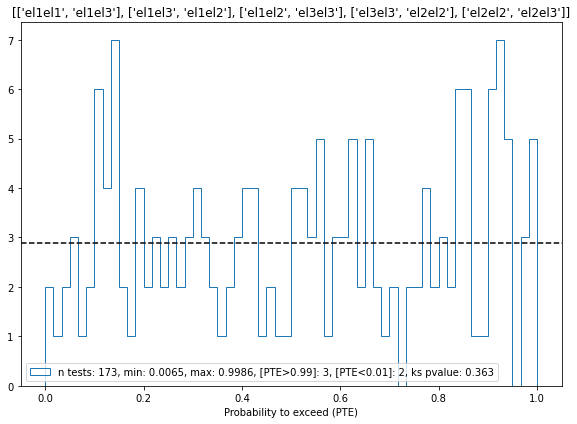

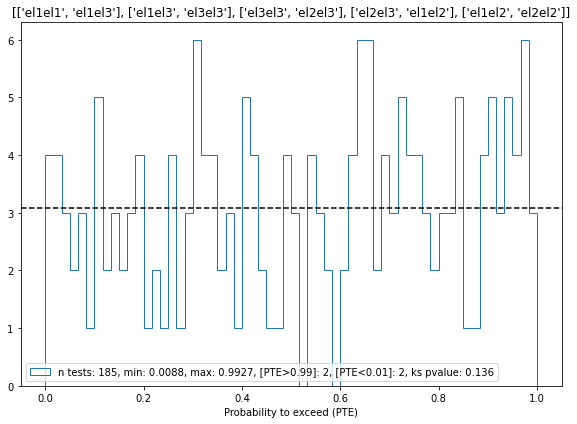

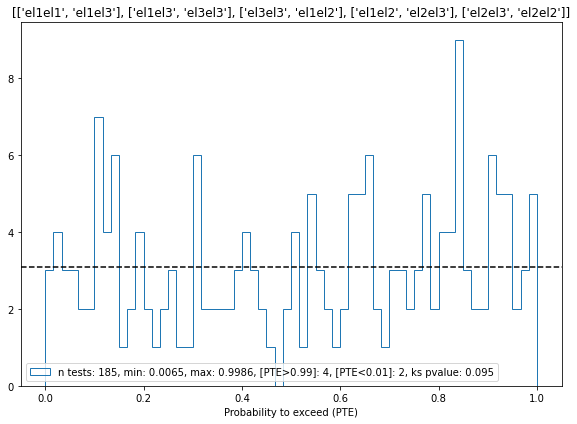

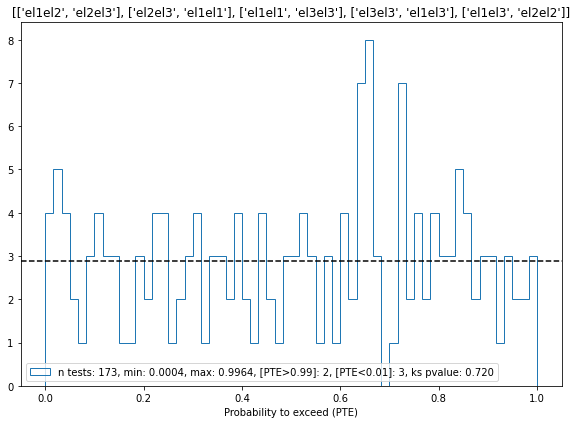

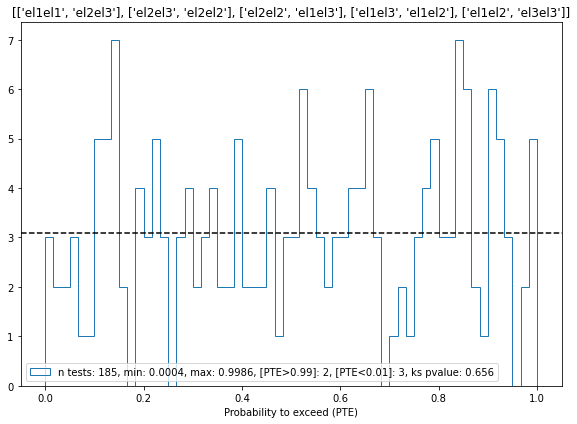

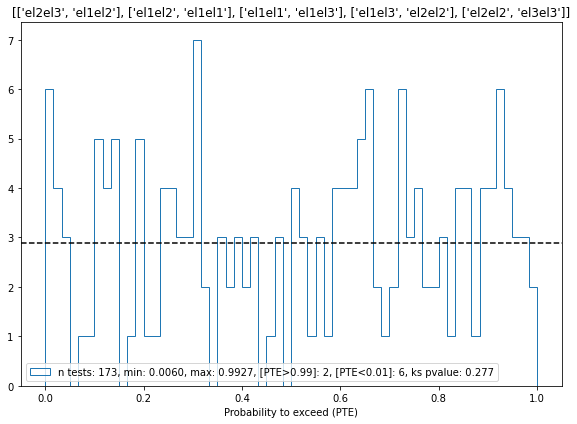

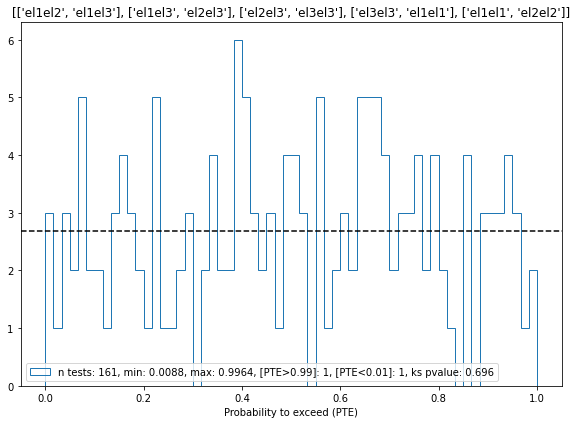

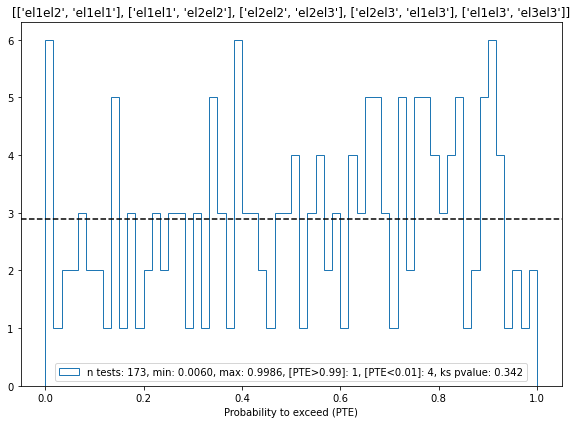

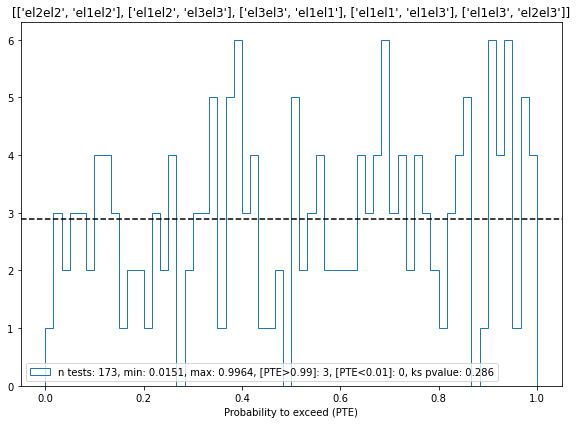

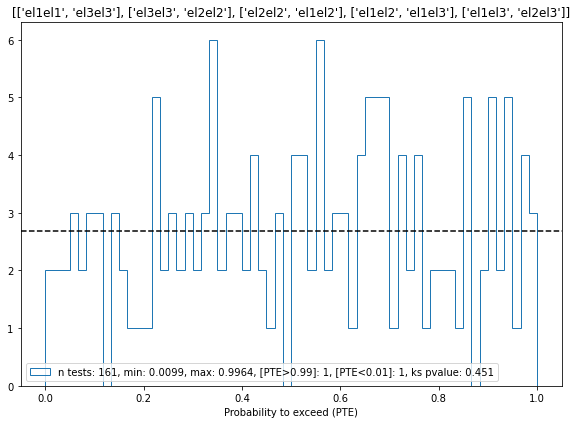

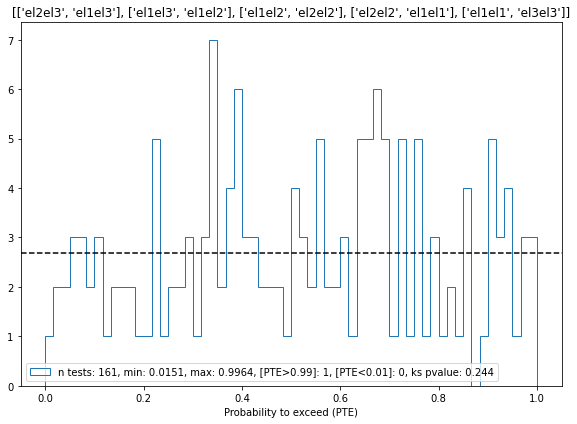

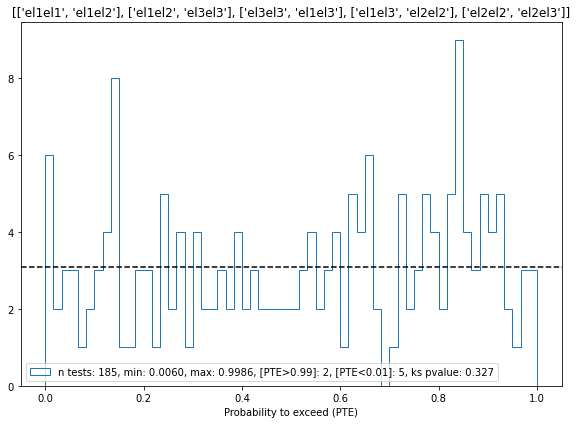

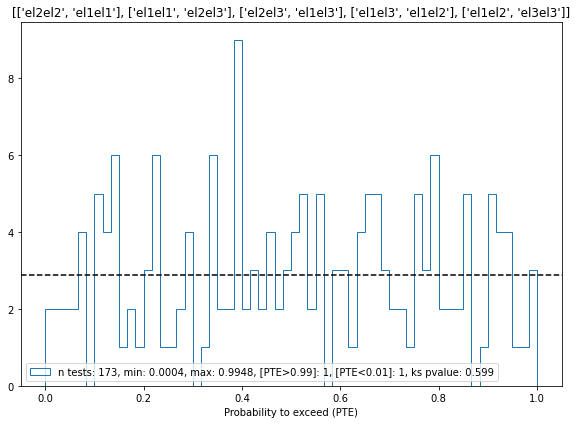

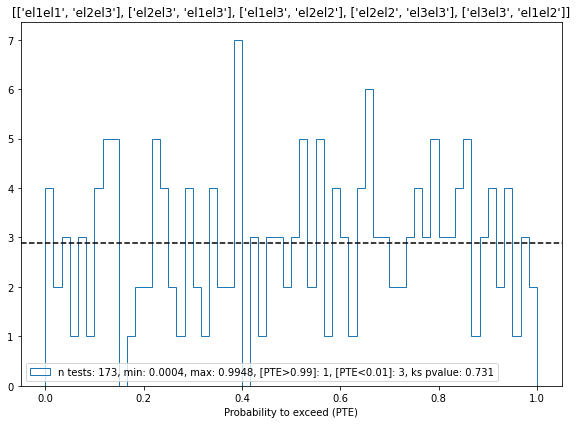

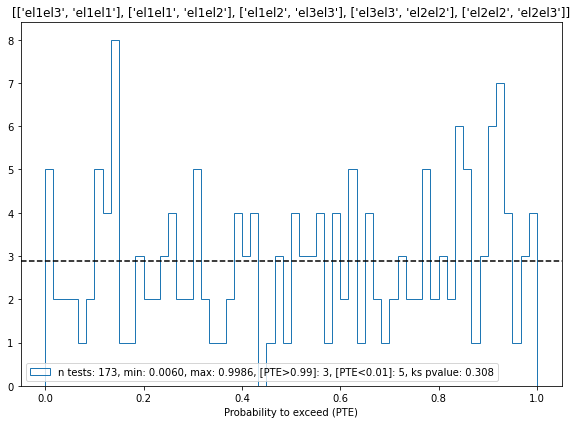

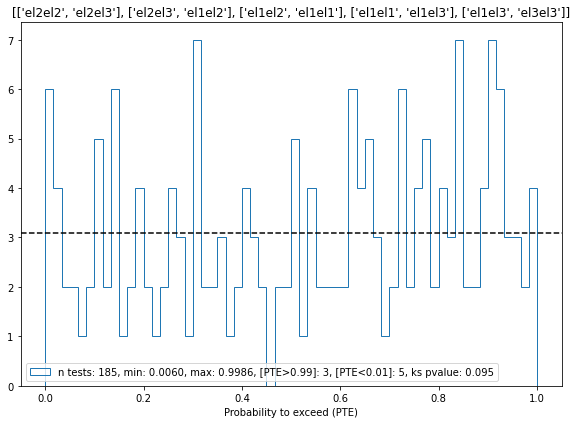

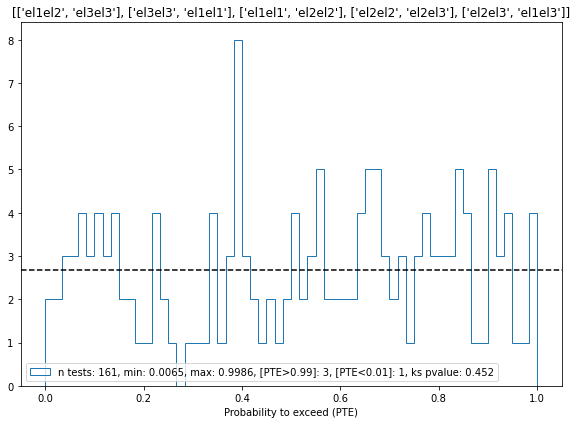

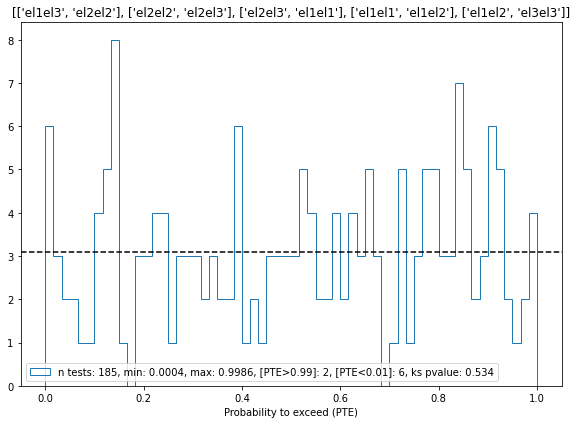

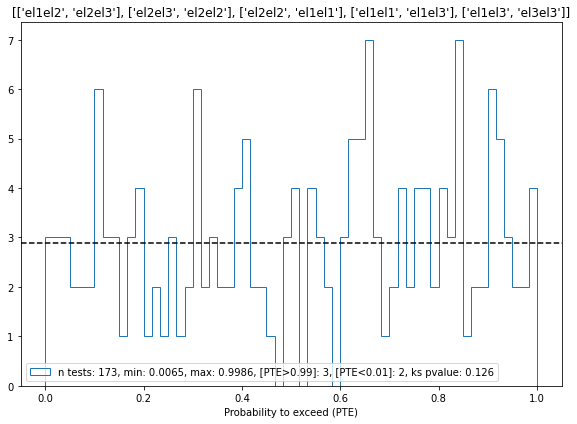

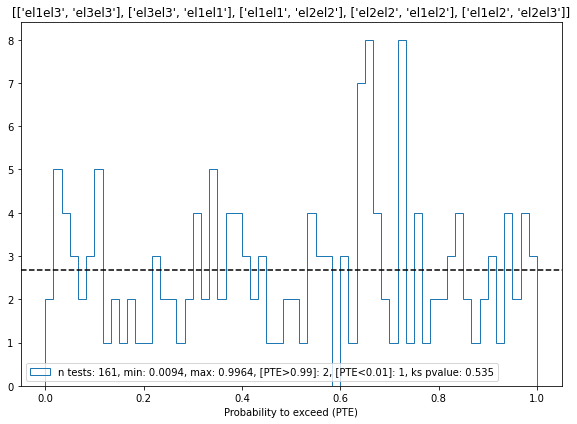

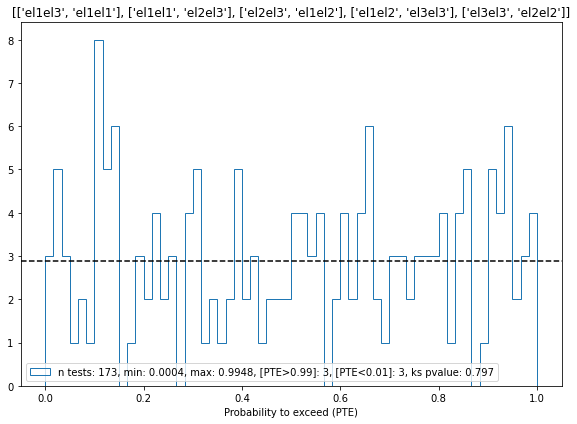

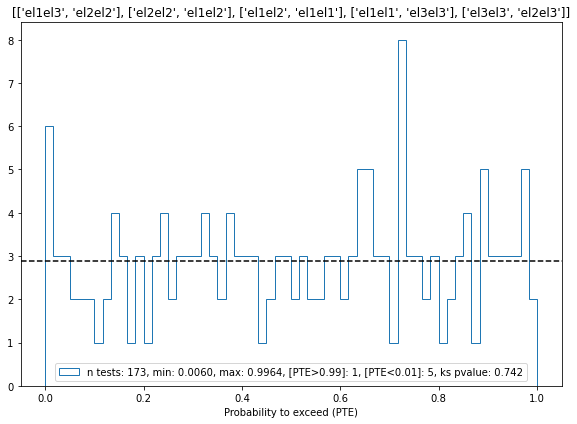

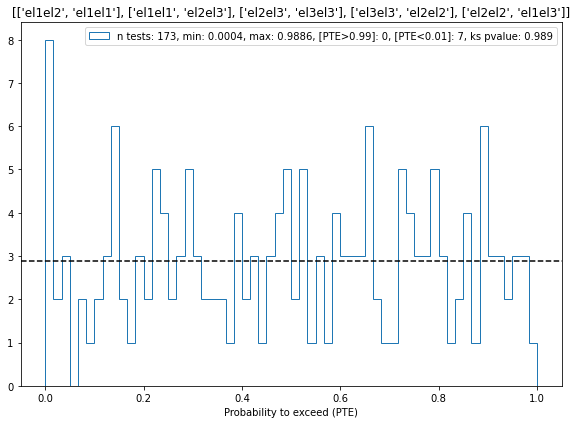

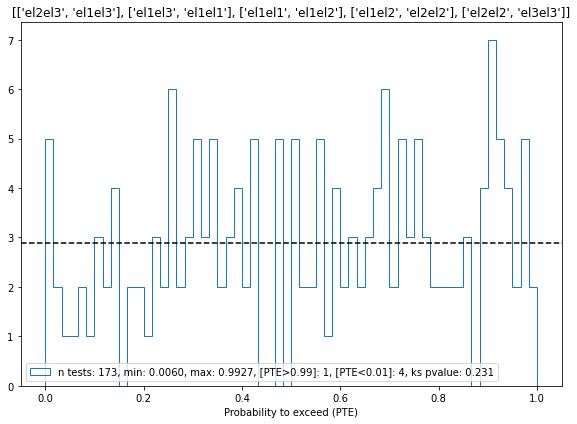

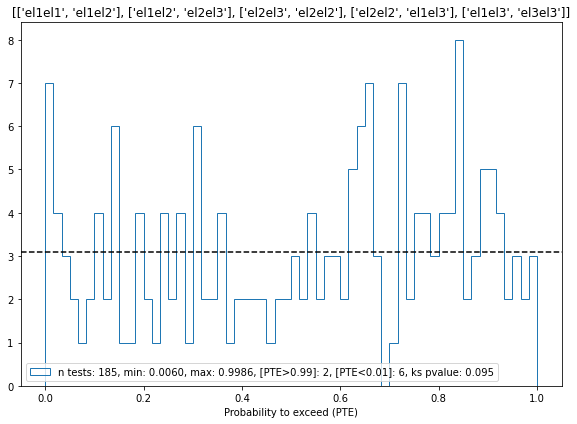

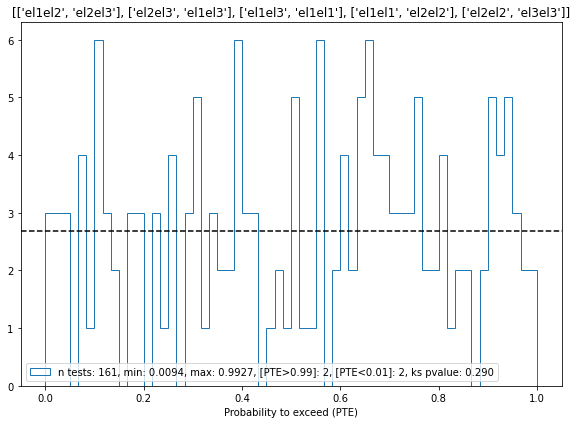

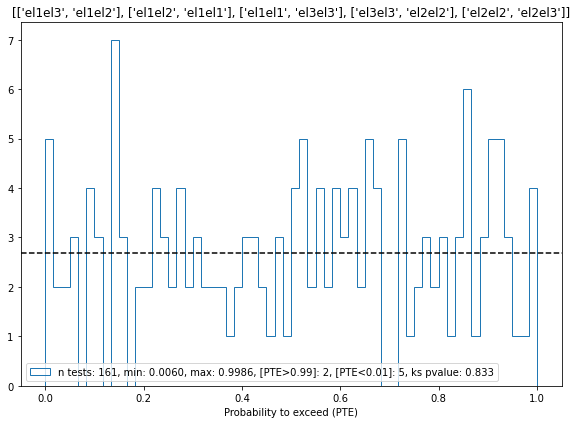

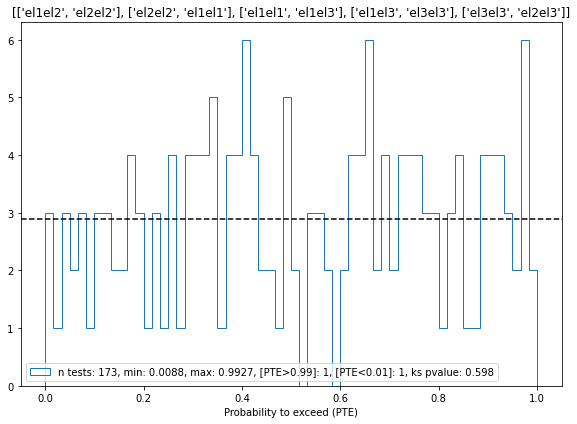

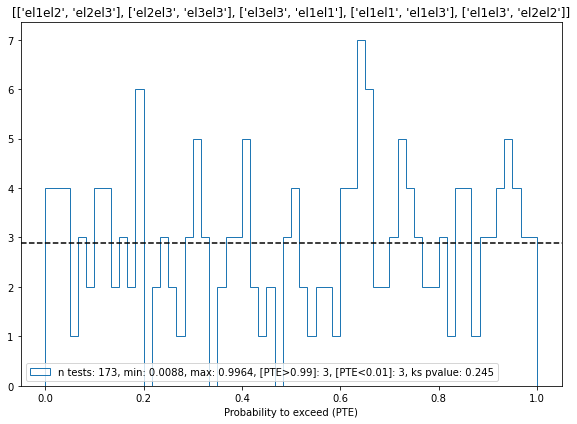

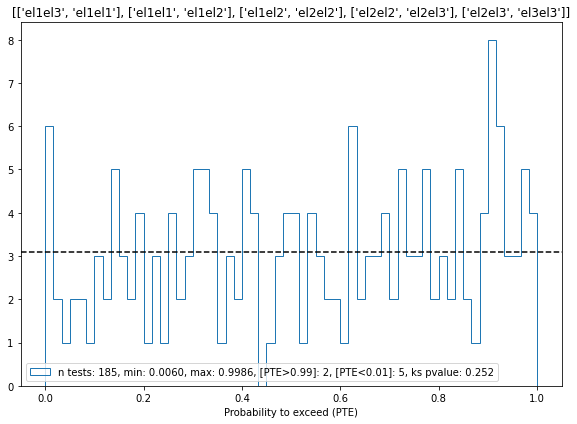

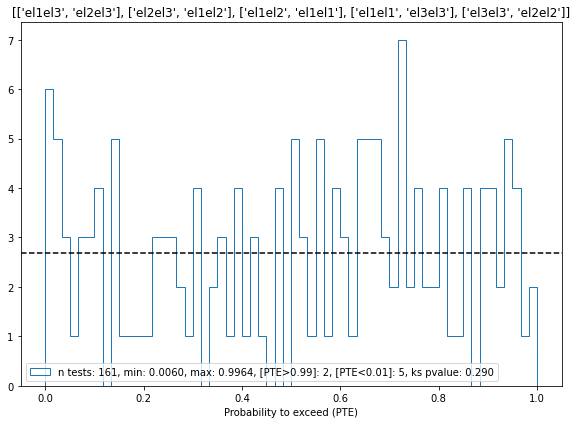

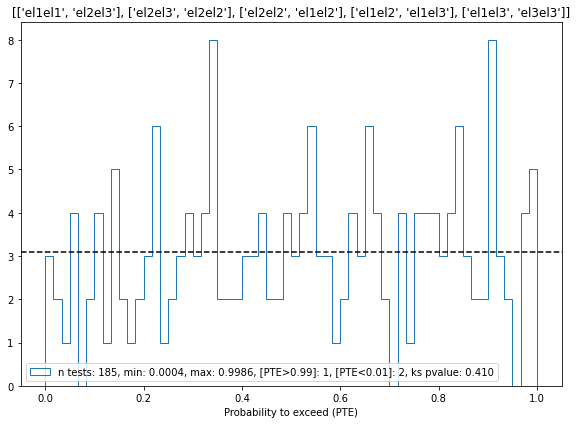

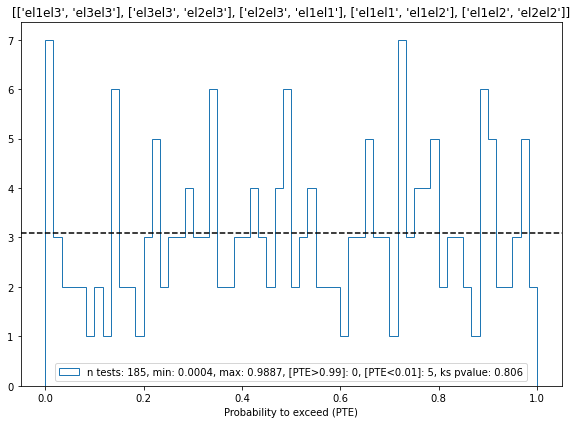

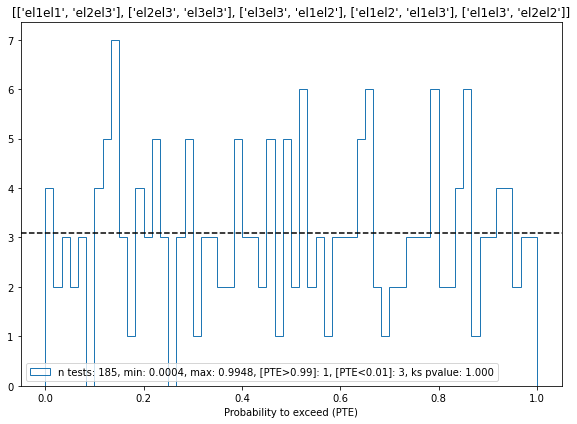

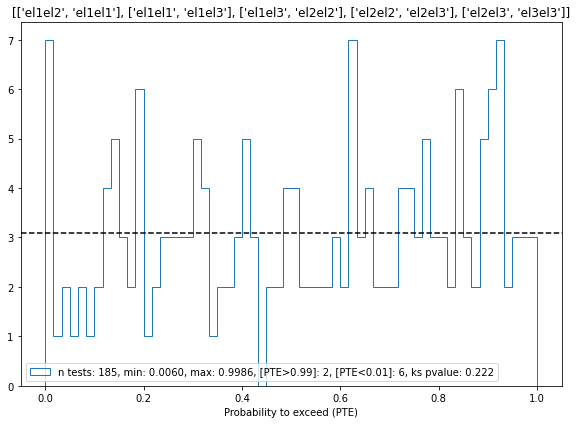

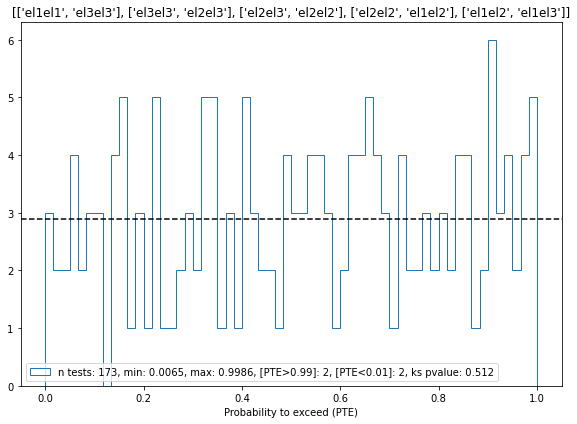

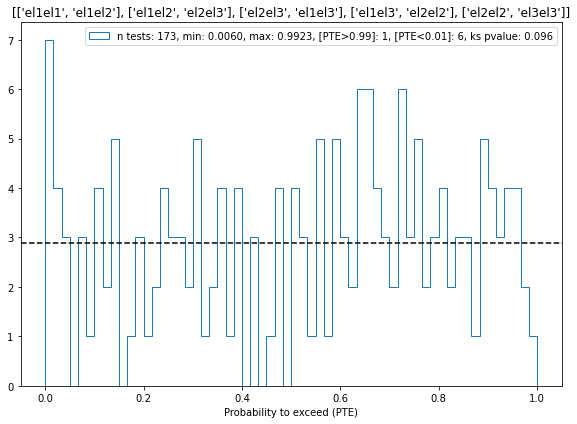

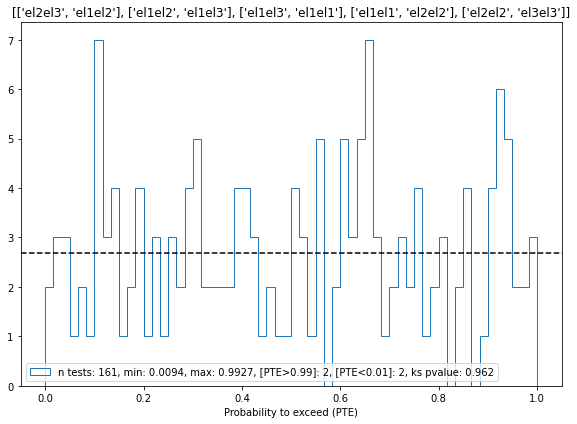

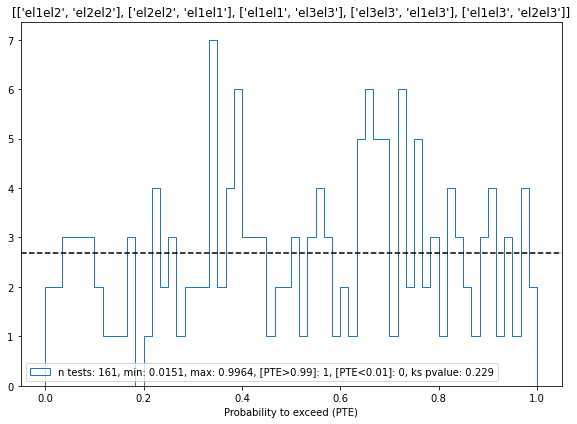

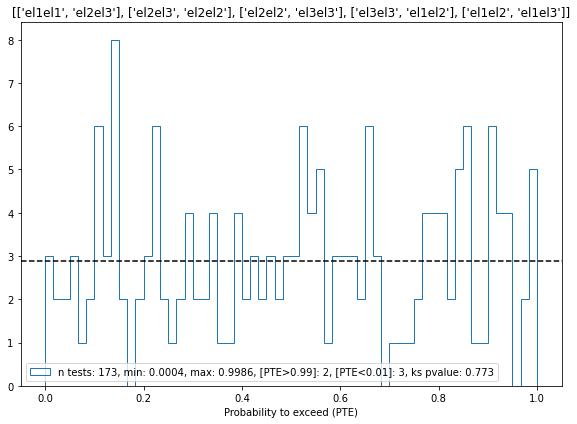

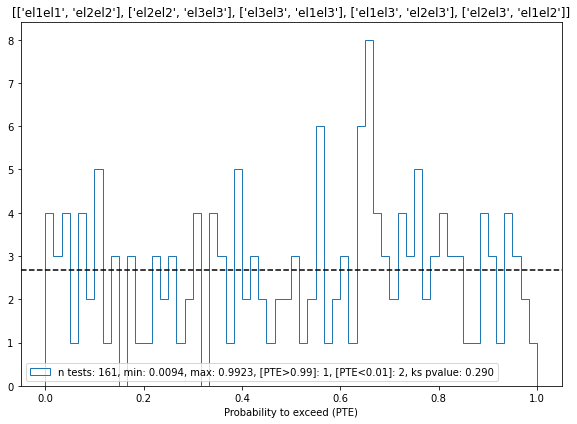

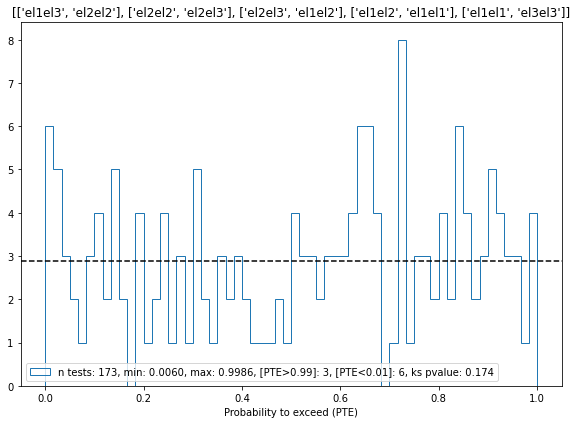

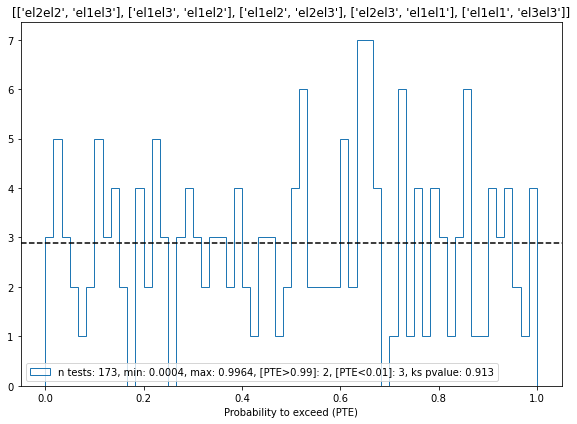

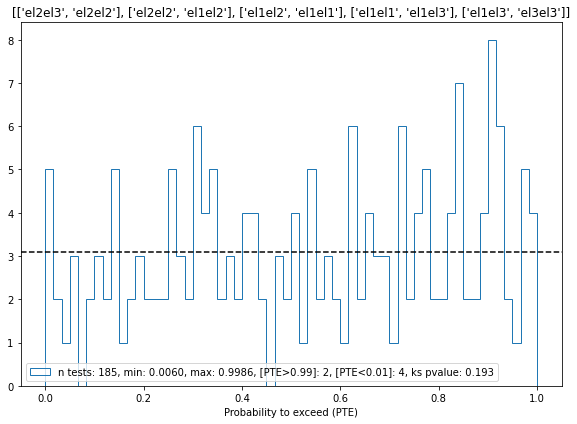

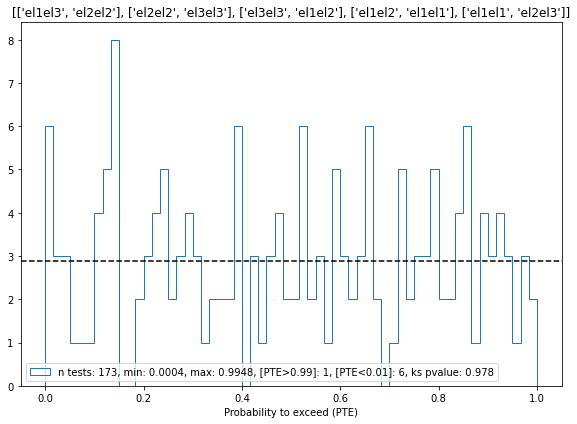

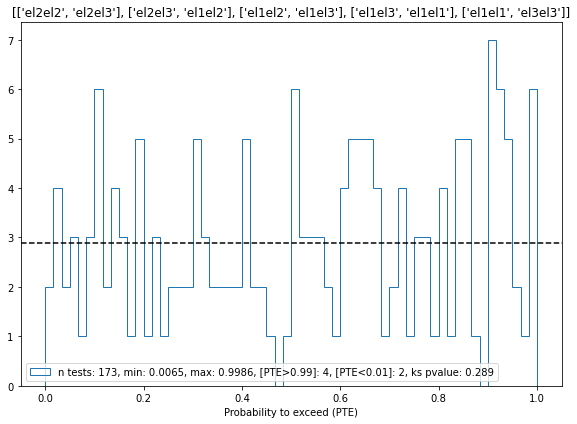

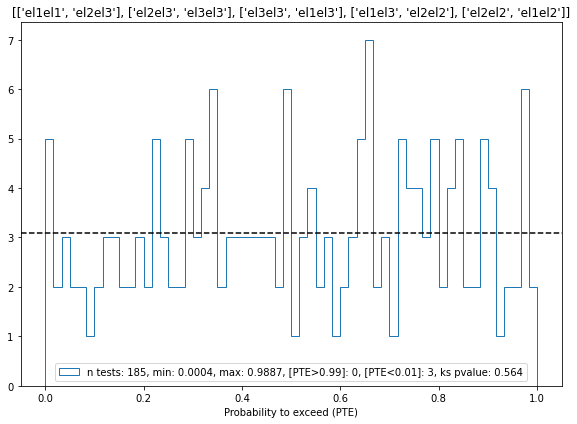

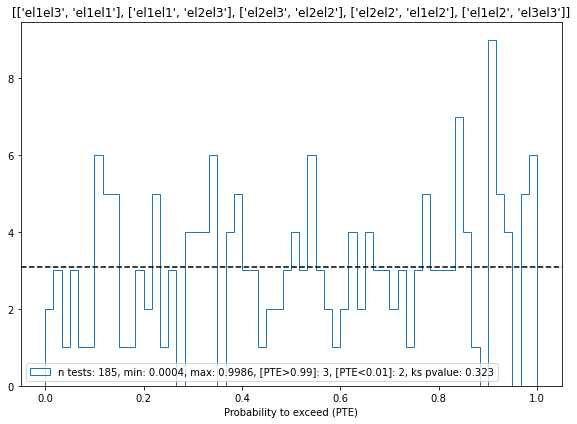

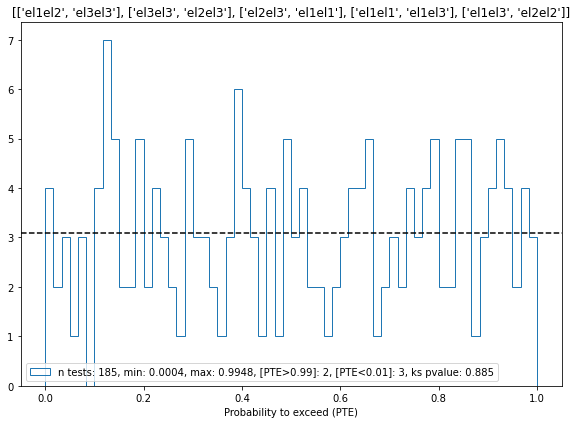

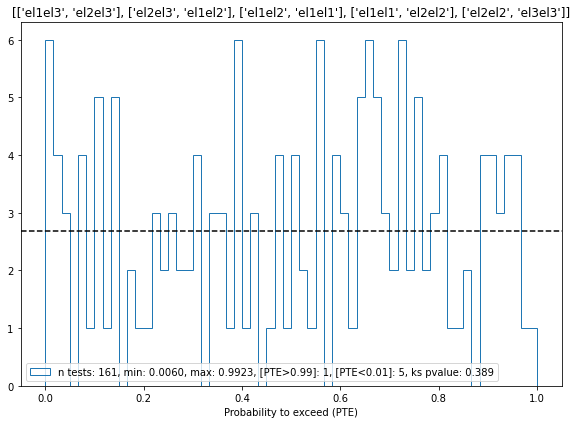

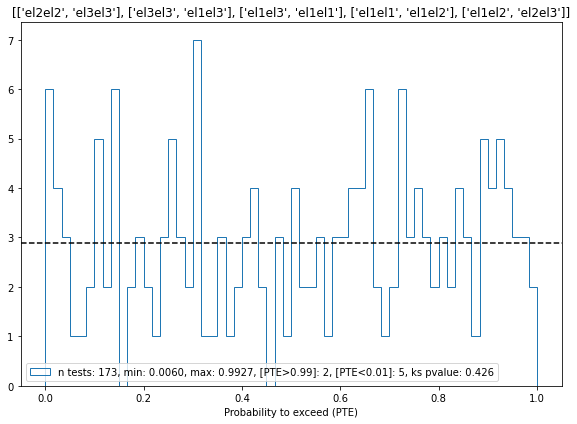

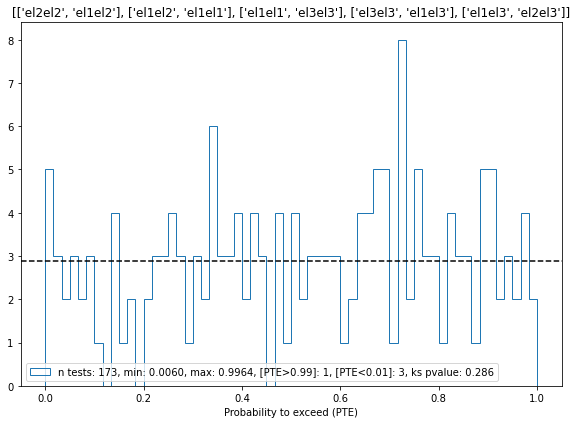

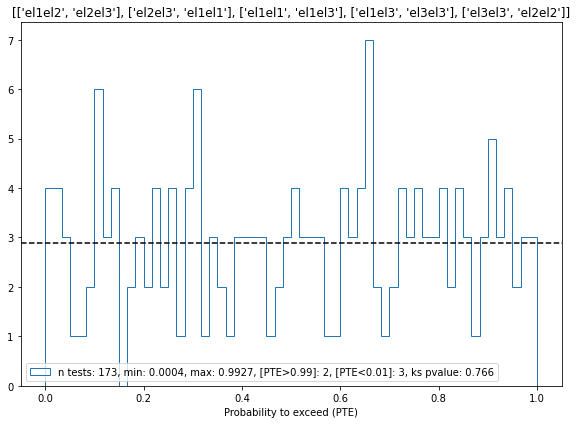

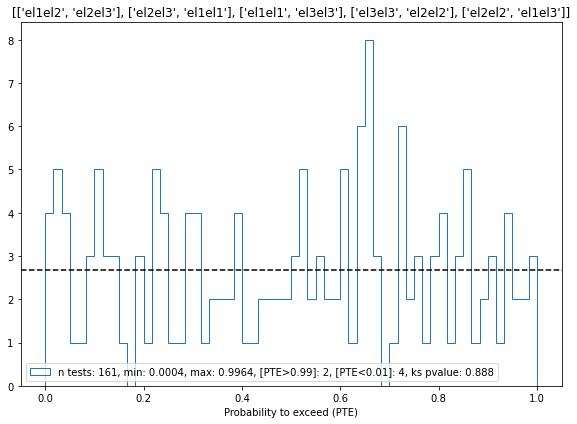

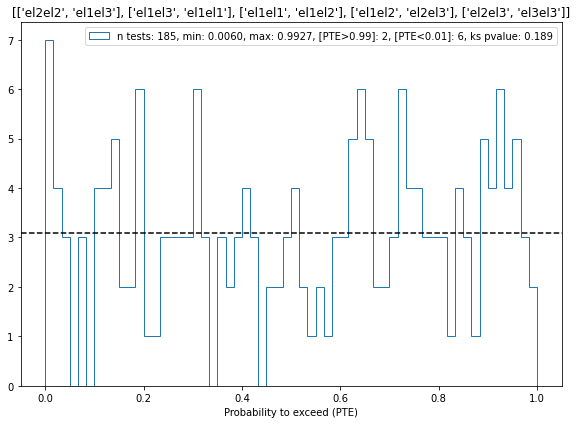

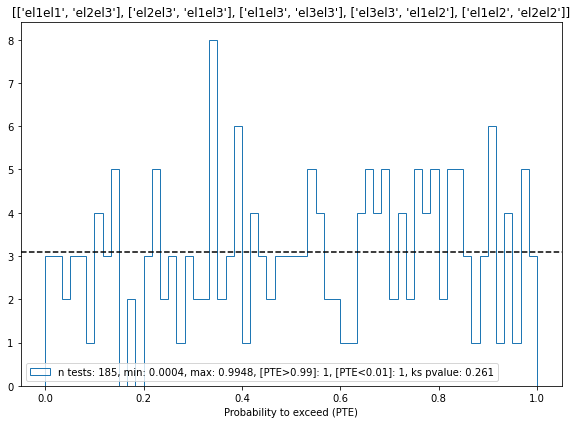

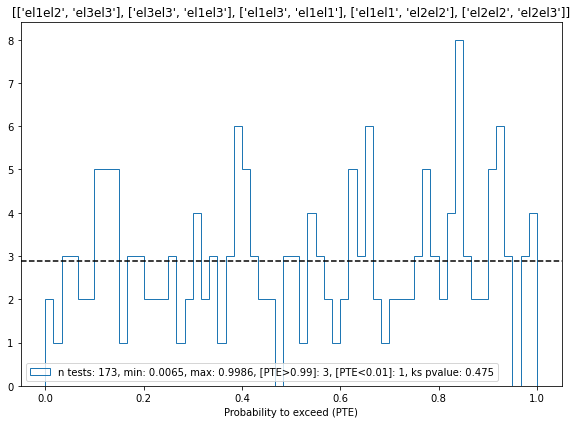

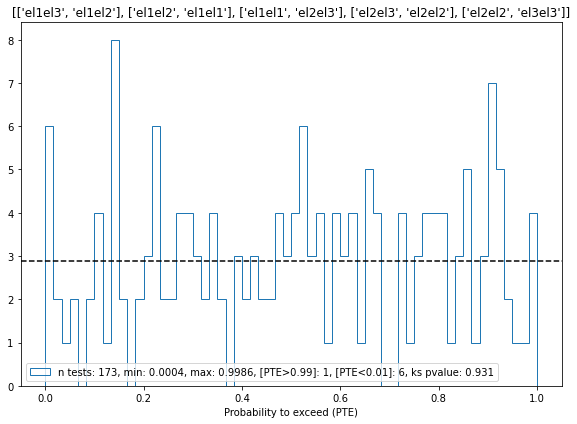

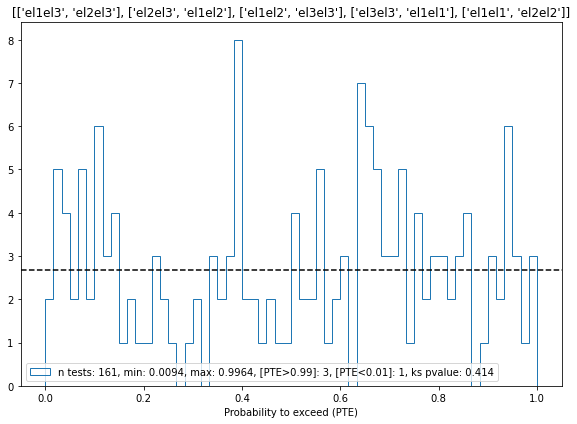

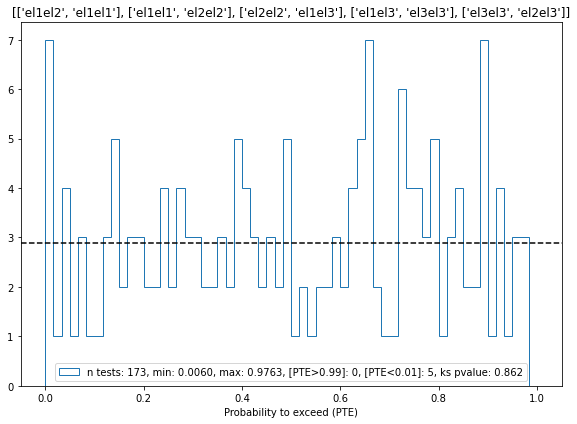

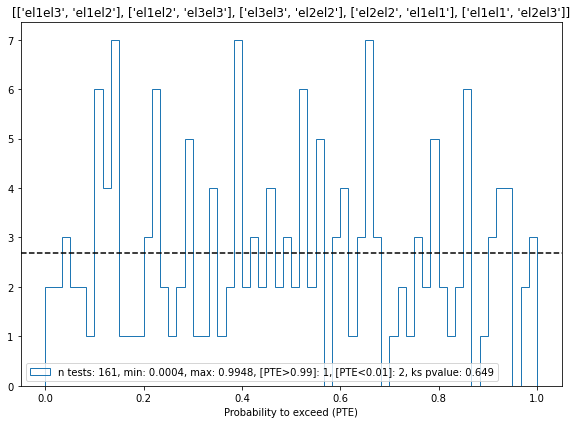

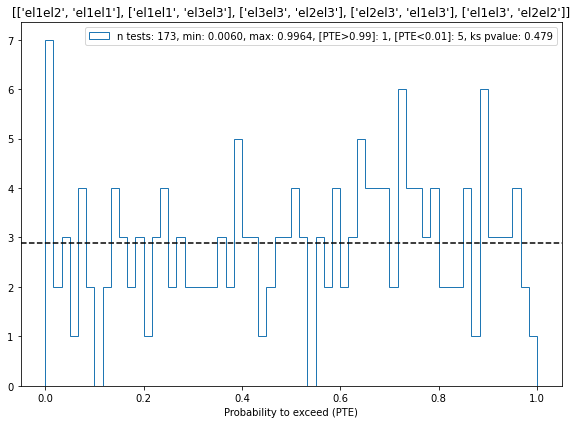

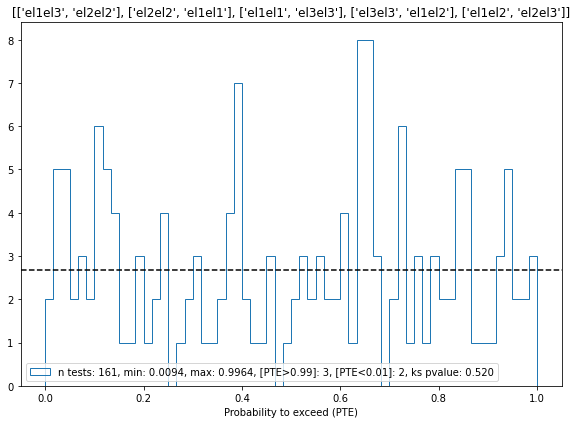

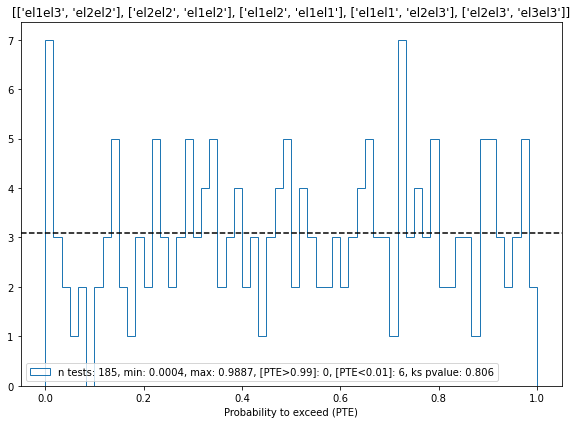

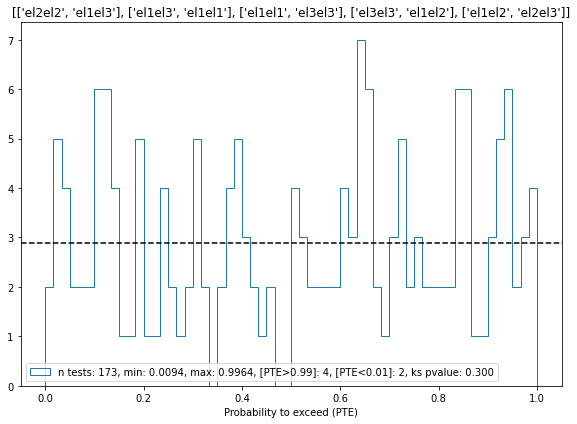

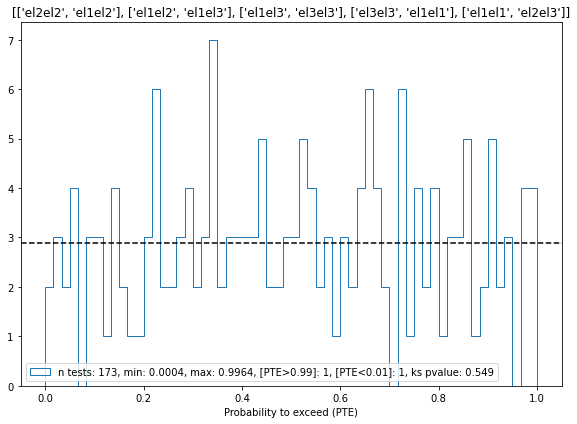

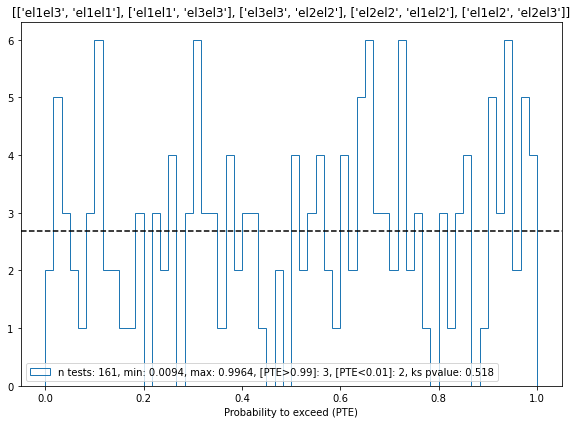

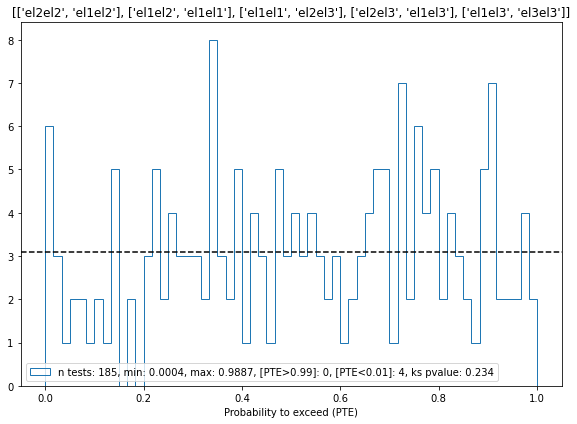

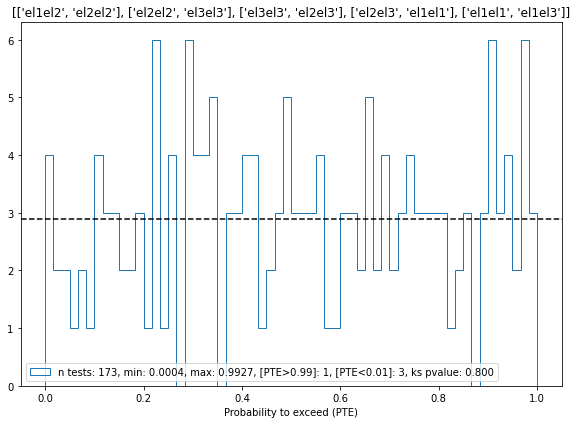

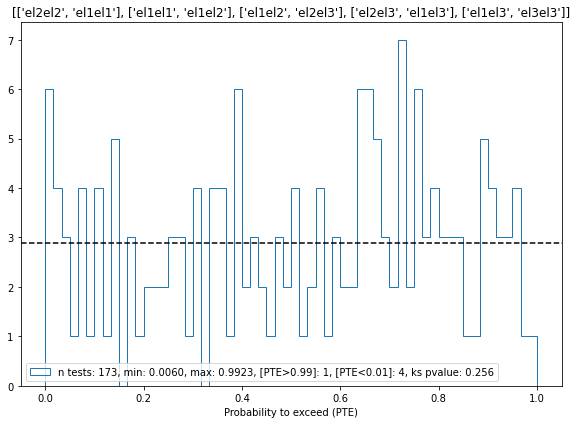

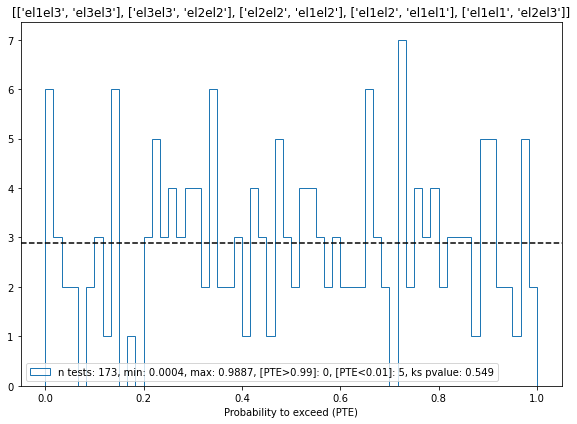

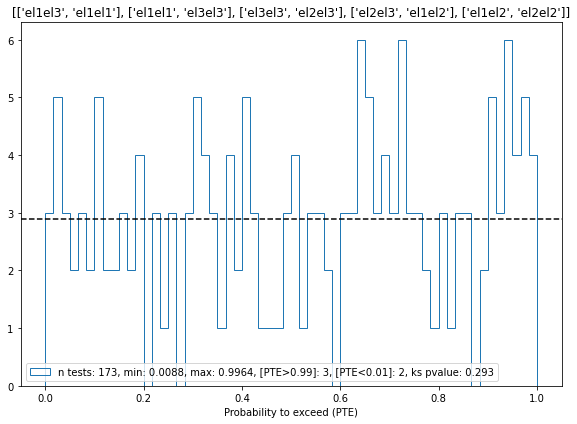

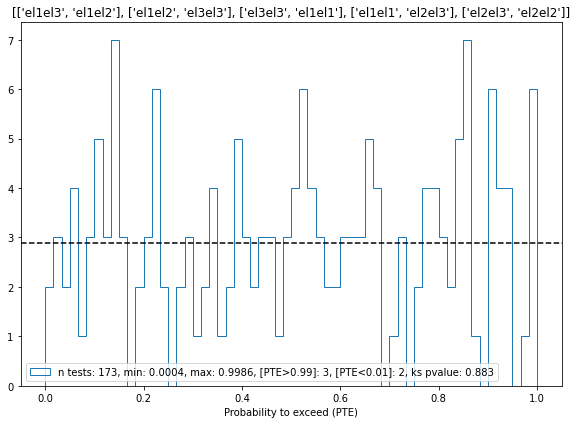

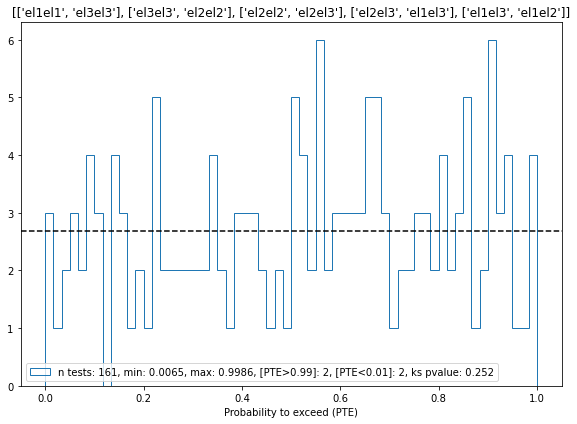

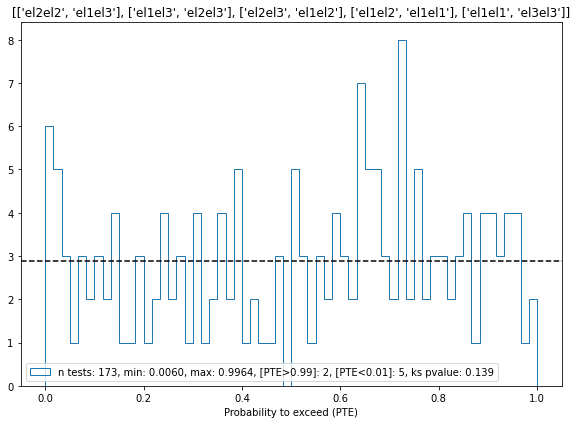

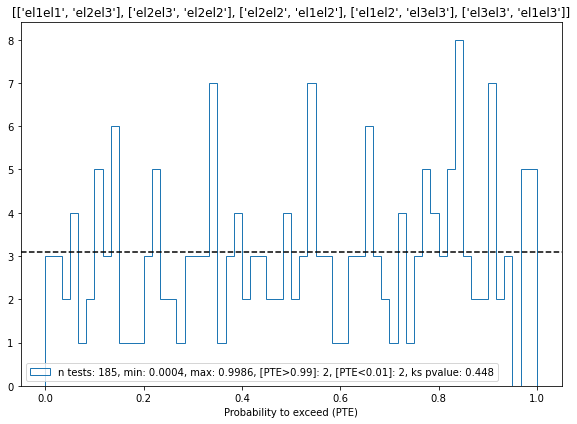

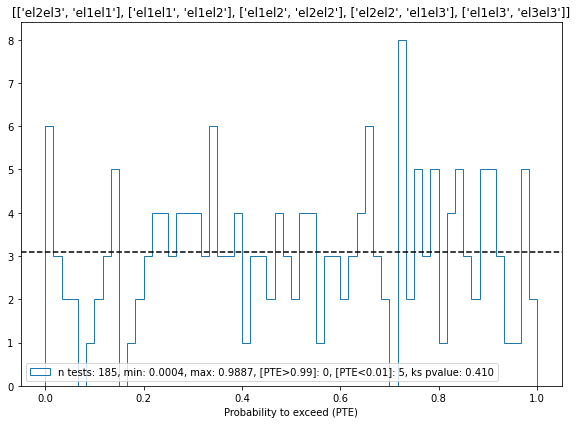

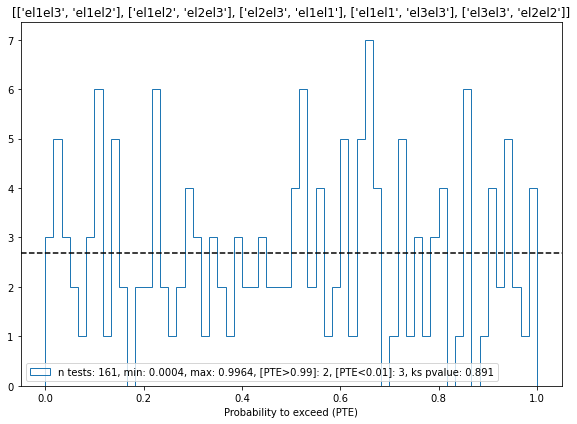

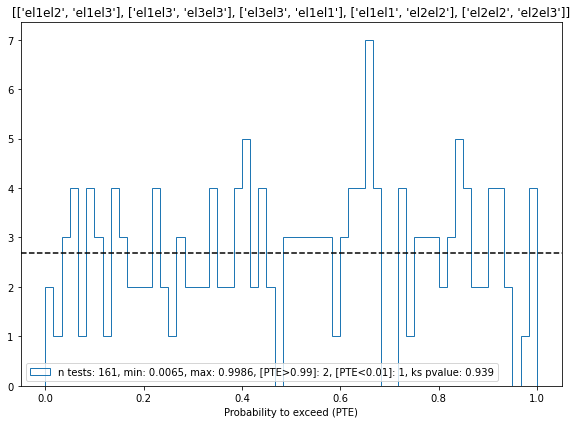

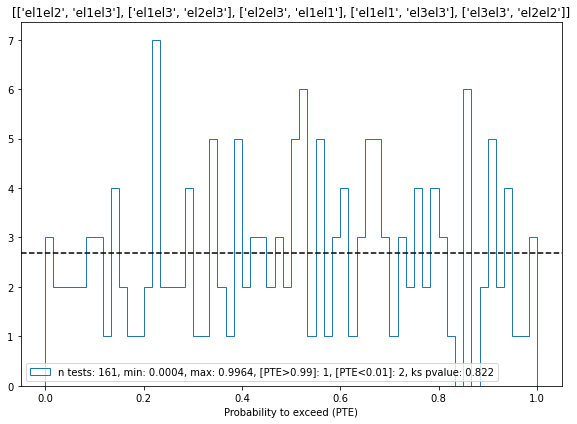

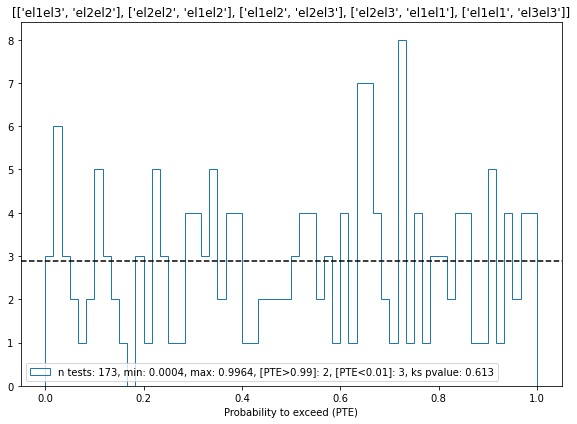

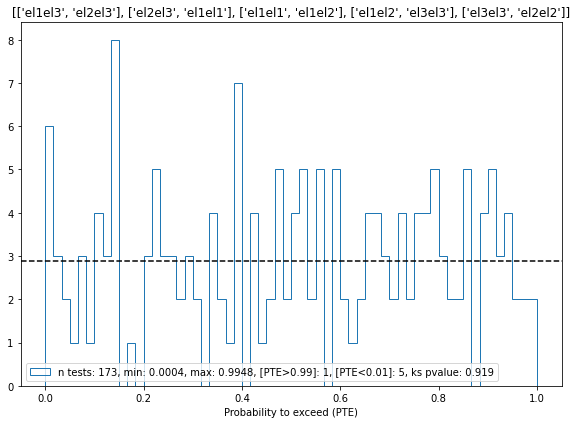

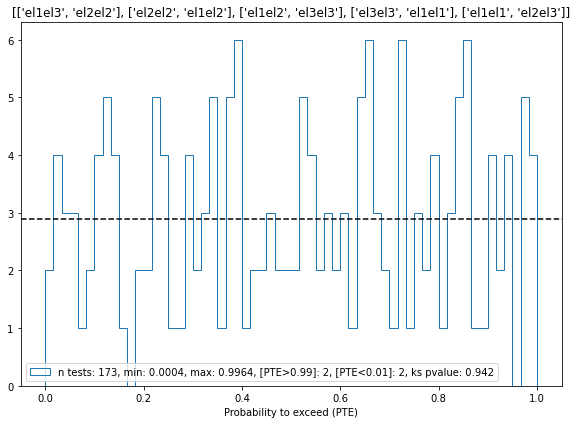

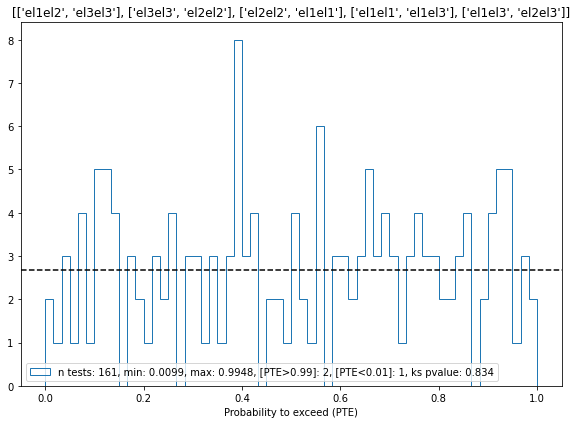

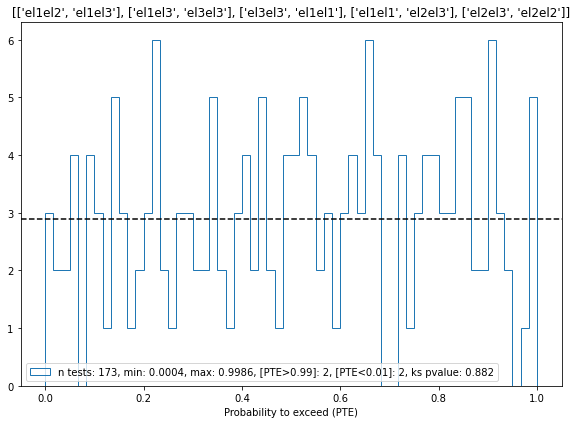

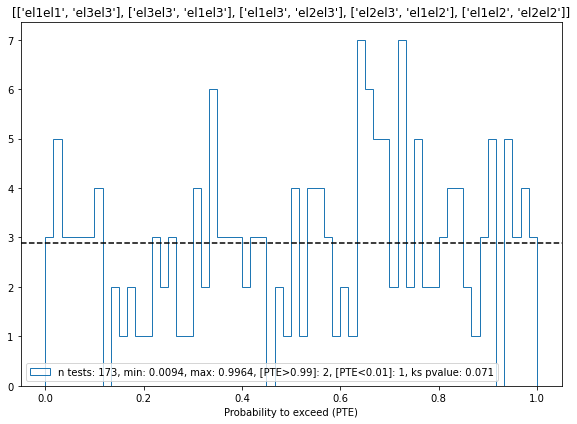

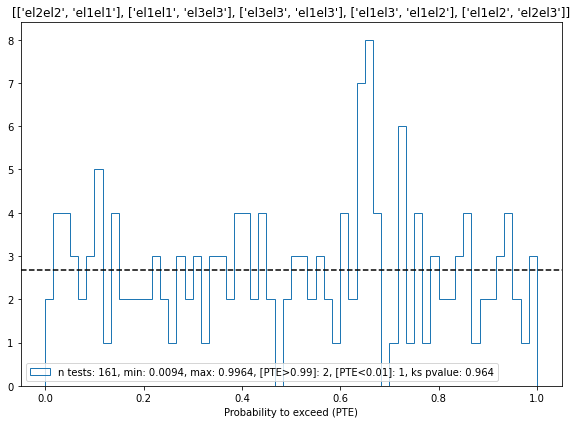

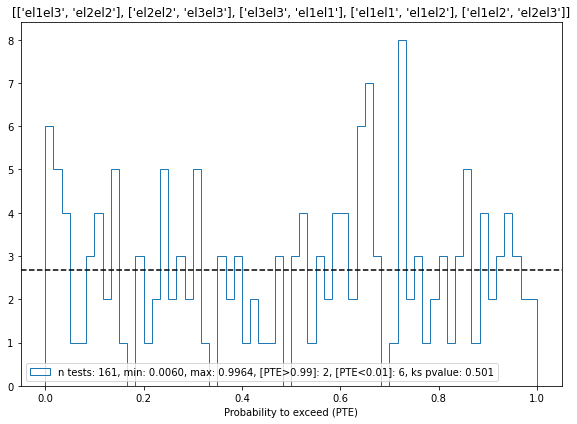

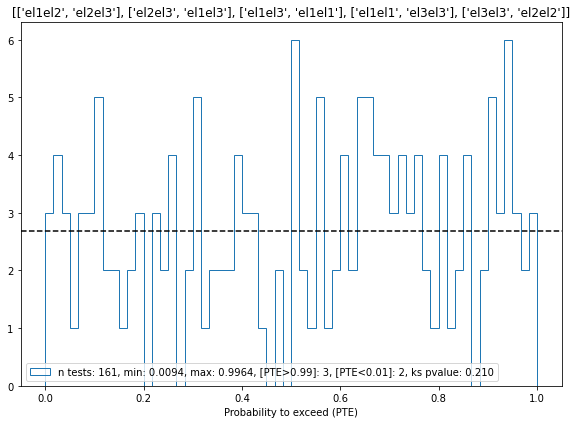

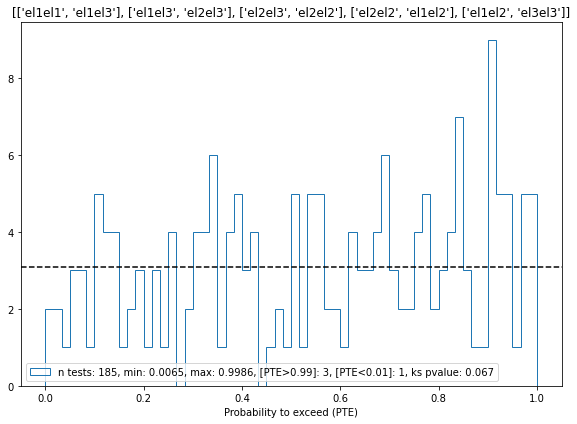

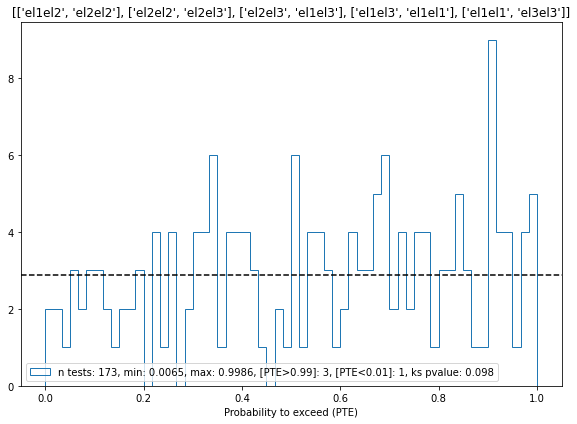

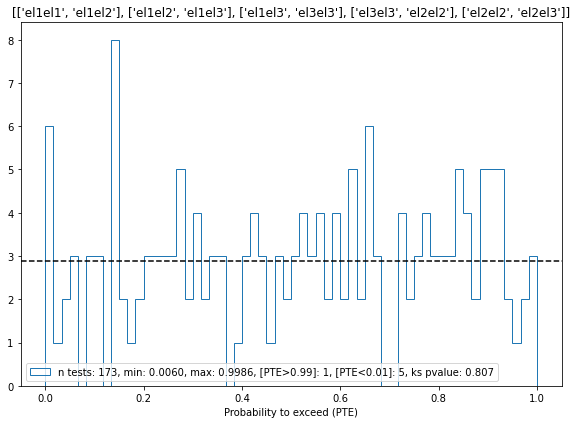

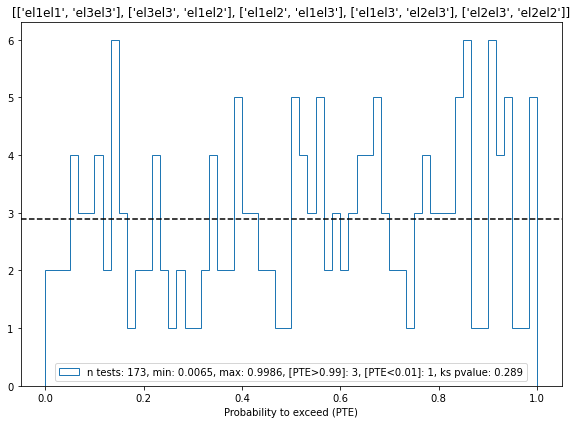

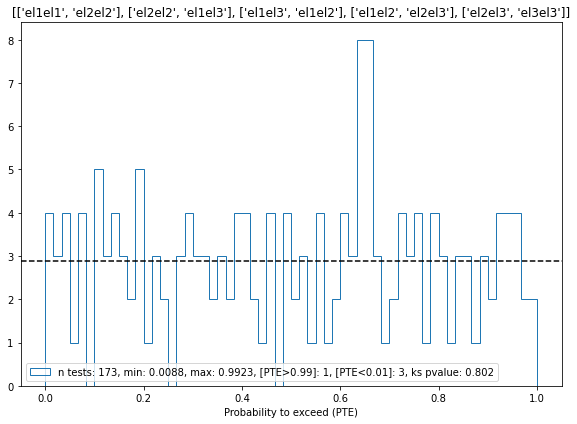

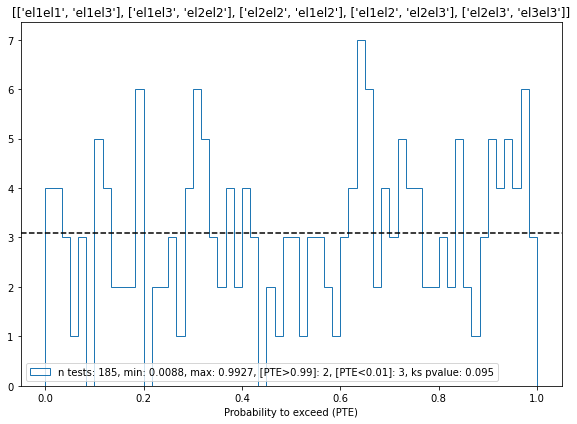

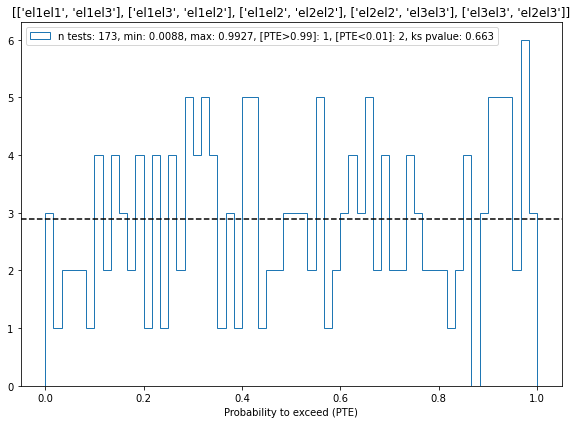

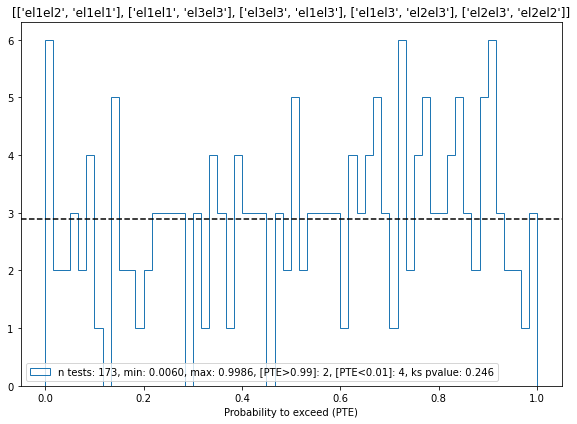

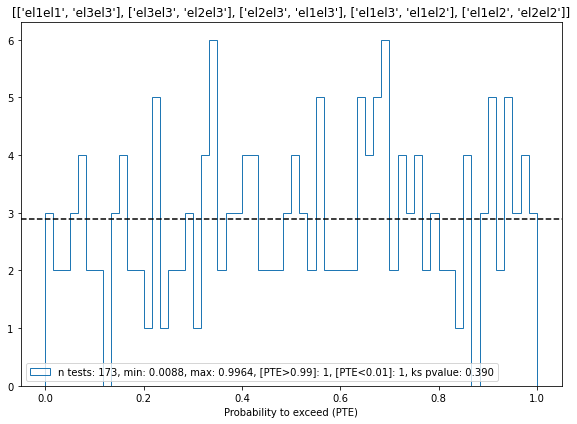

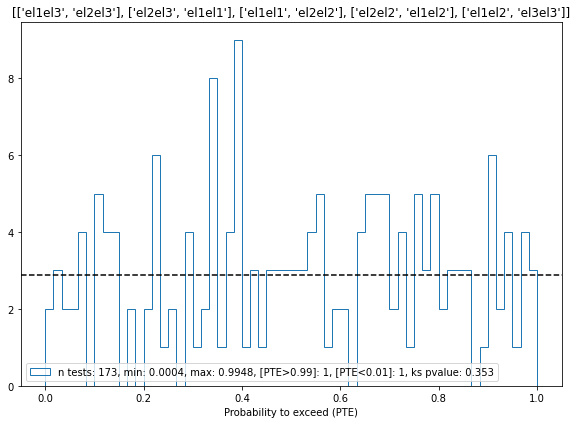

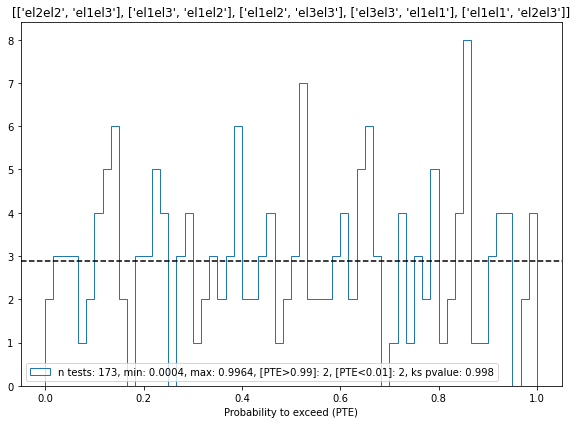

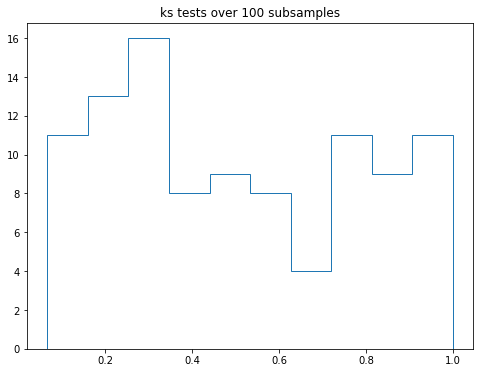

In [6]:
null_test = "elevation"
spectra = ["TT", "TE", "TB", "ET", "BT", "EE", "EB", "BE", "BB"]

if null_test == "elevation":
    surveys = ["el1", "el2", "el3"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 60
    n_subsamp = 100

if null_test == "pwv":
    surveys = ["pwv1", "pwv2"]
    test_arrays = [["pa4_f220"], ["pa5_f090"], ["pa5_f150"],  ["pa6_f090"], ["pa6_f150"]]
    n_bins = 20
    n_subsamp = 3

if null_test == "inout":
    surveys = ["dr6"]
    test_arrays = [["pa4_f220_in", "pa4_f220_out"],
                   ["pa5_f090_in", "pa5_f090_out"],
                   ["pa5_f150_in", "pa5_f150_out"],
                   ["pa6_f090_in", "pa6_f090_out"],
                   ["pa6_f150_in", "pa6_f150_out"]]
    n_bins = 20
    n_subsamp = 3

list_of_pte_lists = [[] for i in range(n_subsamp)]
for t_ar in test_arrays:
    null_list, crosspecs = get_null_list(surveys, t_ar, spectra)
    best_crosspecs = get_best_null_sets(crosspecs)
    
    seed(2) # same sample of best_crosspecs for each array
    crosspecs_samples = sample(best_crosspecs, n_subsamp)
    print(crosspecs_samples)

    for i, crosspecs in enumerate(crosspecs_samples):
        for null in null_list:
            mode, (ms1, ms2), (ms3, ms4) = null
            if [(ms1, ms2), (ms3, ms4)] not in crosspecs and [(ms3, ms4), (ms1, ms2)] not in crosspecs:
                # print([(ms1, ms2), (ms3, ms4)], 'not in', crosspecs)
                continue

            if null_test in ["elevation", "pwv"]:
                my_ar = t_ar[0]
            else:
                my_ar = t_ar[0][:8]

            if (ms1 == ms2) & (ms3 == ms4) & (mode in ["ET", "BT", "BE"]) :
                # print(f"skip {ms1}x{ms2} - {ms3}x{ms4} {mode} since it's a doublon of {mode[::-1]}")
                continue
            if (my_ar == "pa4_f220") & (mode != "TT"):
                continue

            res_dict = pickle.load(open(f"/scratch/gpfs/zatkins/data/simonsobs/PSpipe/project/dr6v4_unblinding/nulls/{null_test}/null_test_{my_ar}/diff_{mode}_{ms1}x{ms2}_{ms3}x{ms4}.pkl", "rb"))

            name = res_dict["fname"]
            chi2 = res_dict["chi2"]
            pte = res_dict["pte"]

            list_of_pte_lists[i].append(pte)

pte_histo(null_test, list_of_pte_lists, crosspecs_samples, n_bins)